In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
src_dir_path = '/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/File_List/TSB-AD-M-Eva.csv'

In [24]:
file_list_df = pd.read_csv(src_dir_path)
file_list = file_list_df.iloc[:, 0].tolist()
print(f"Total number of files: {len(file_list)}")

Total number of files: 180


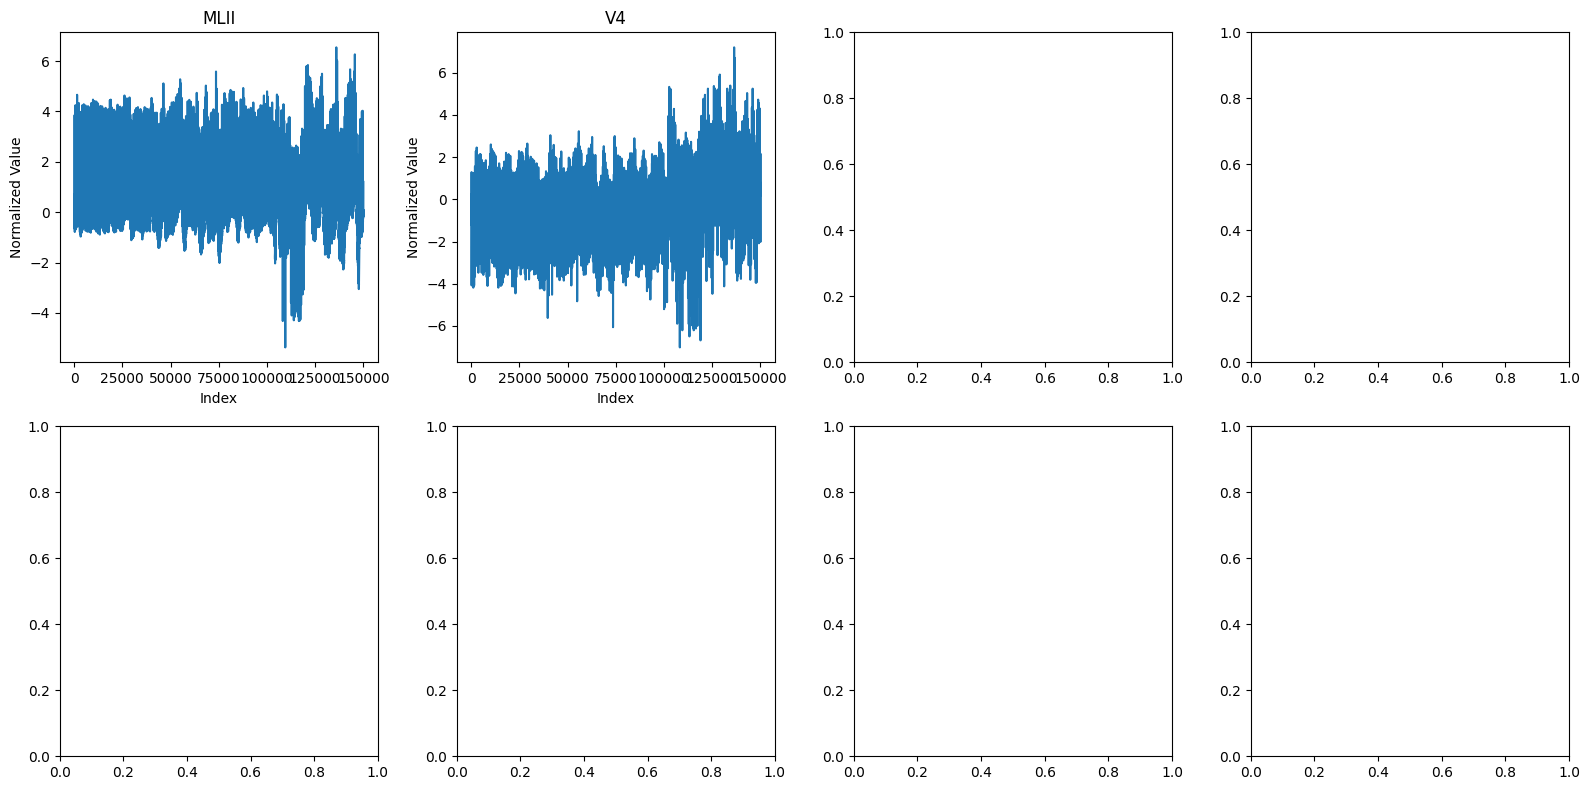

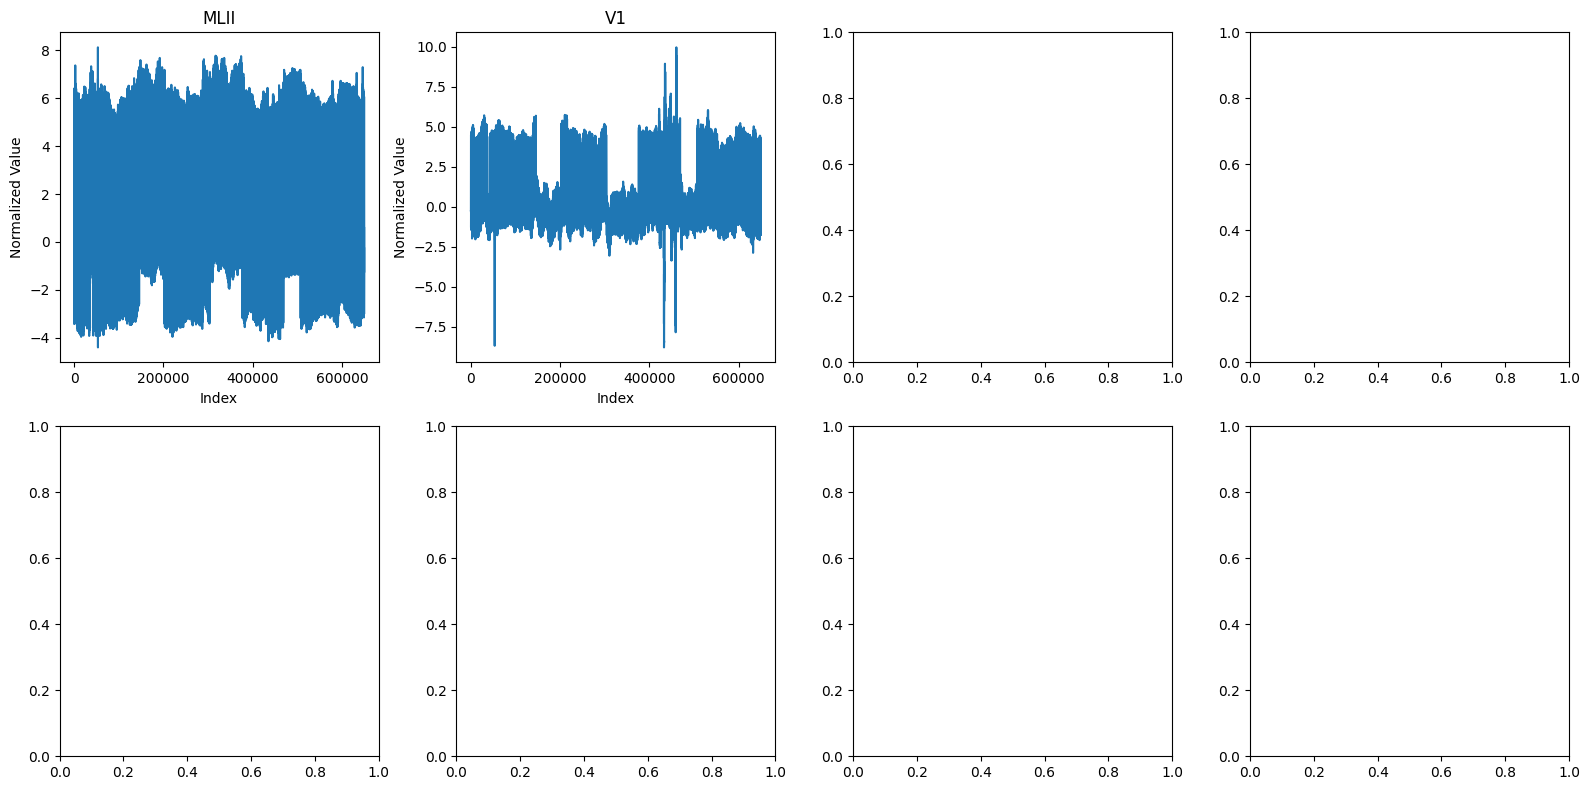

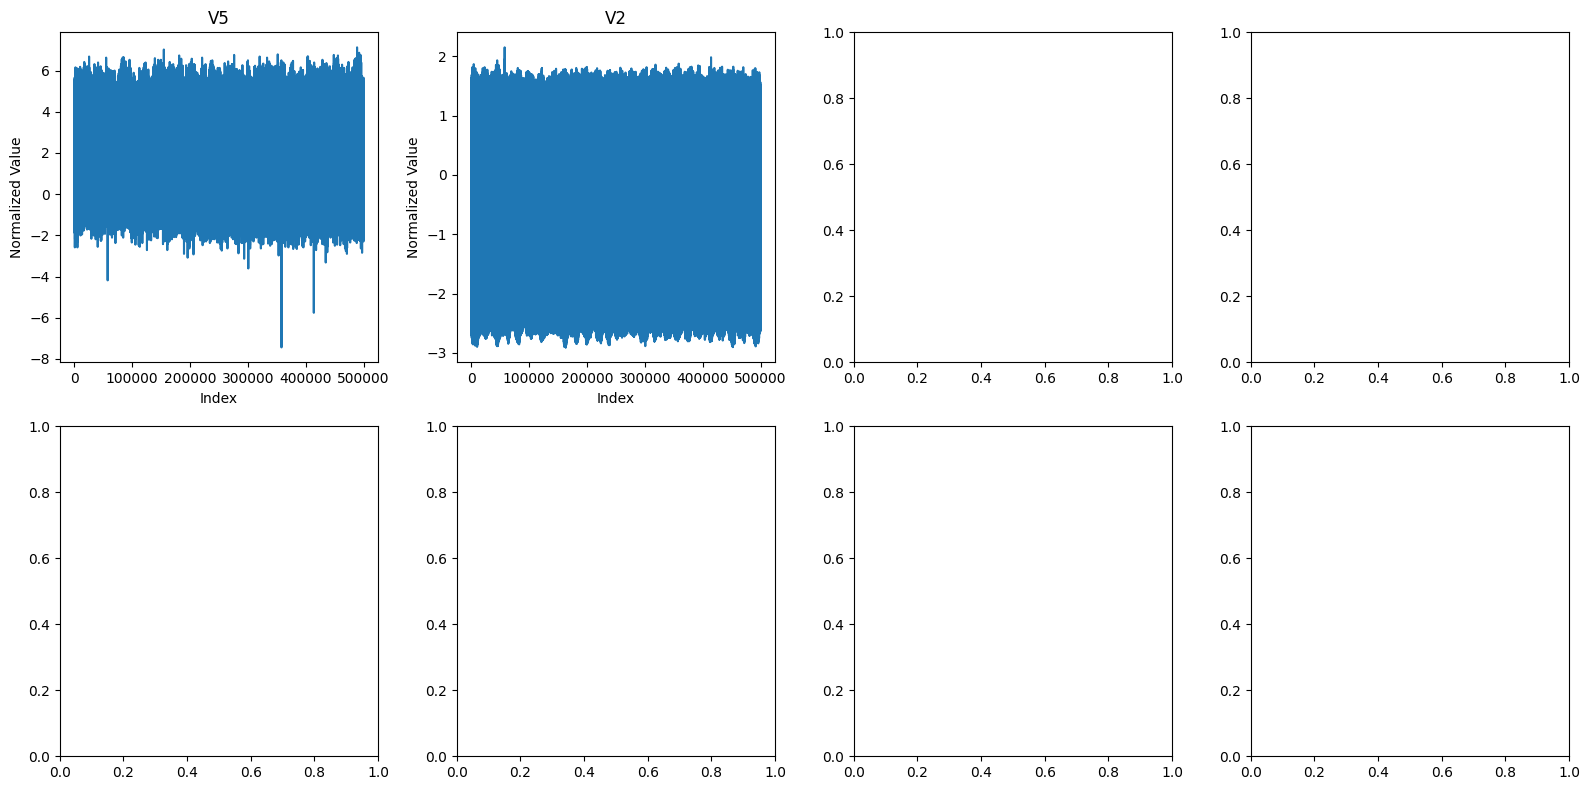

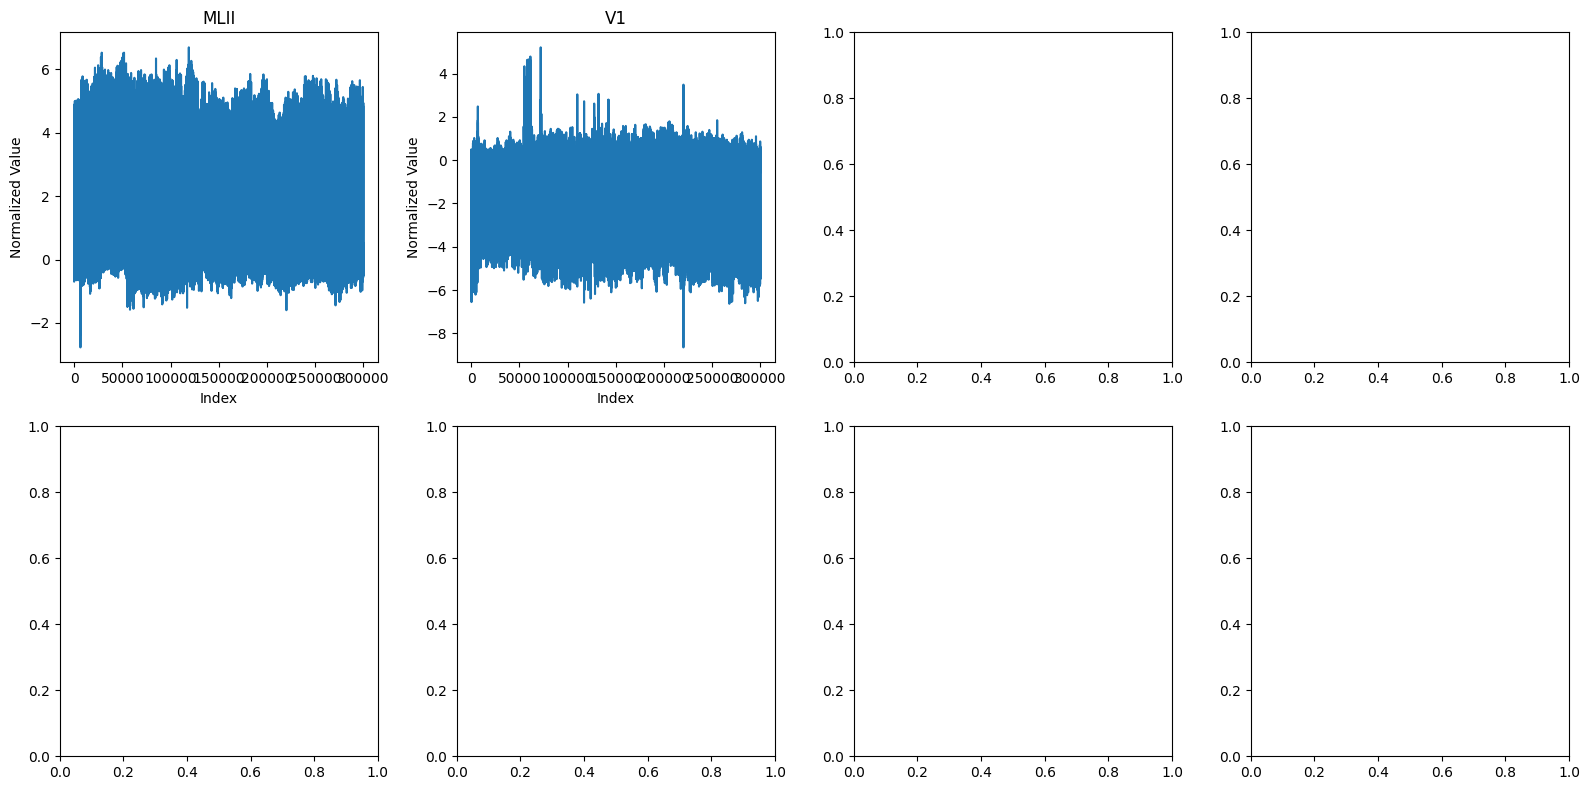

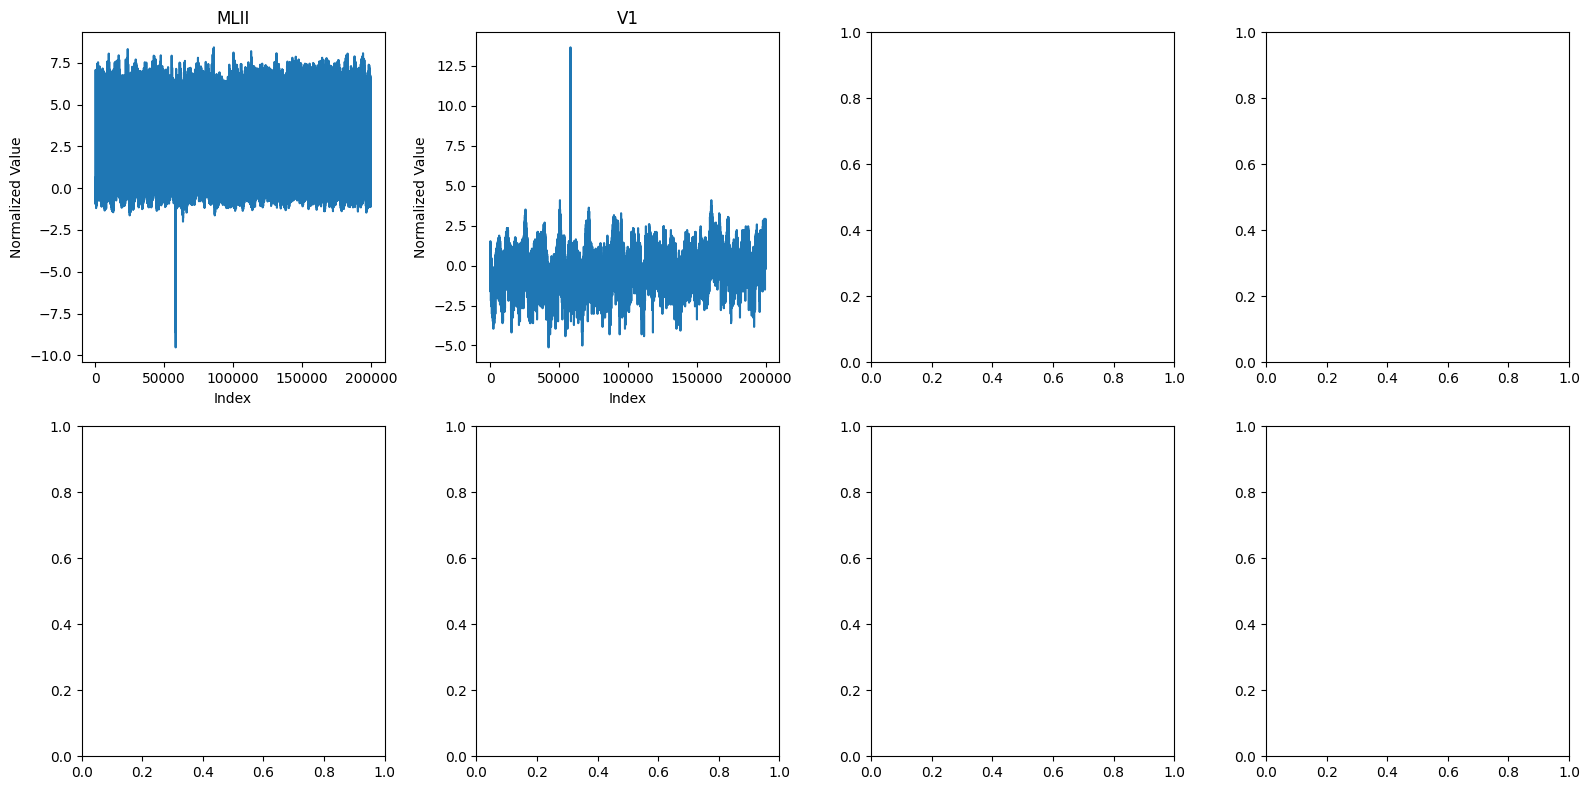

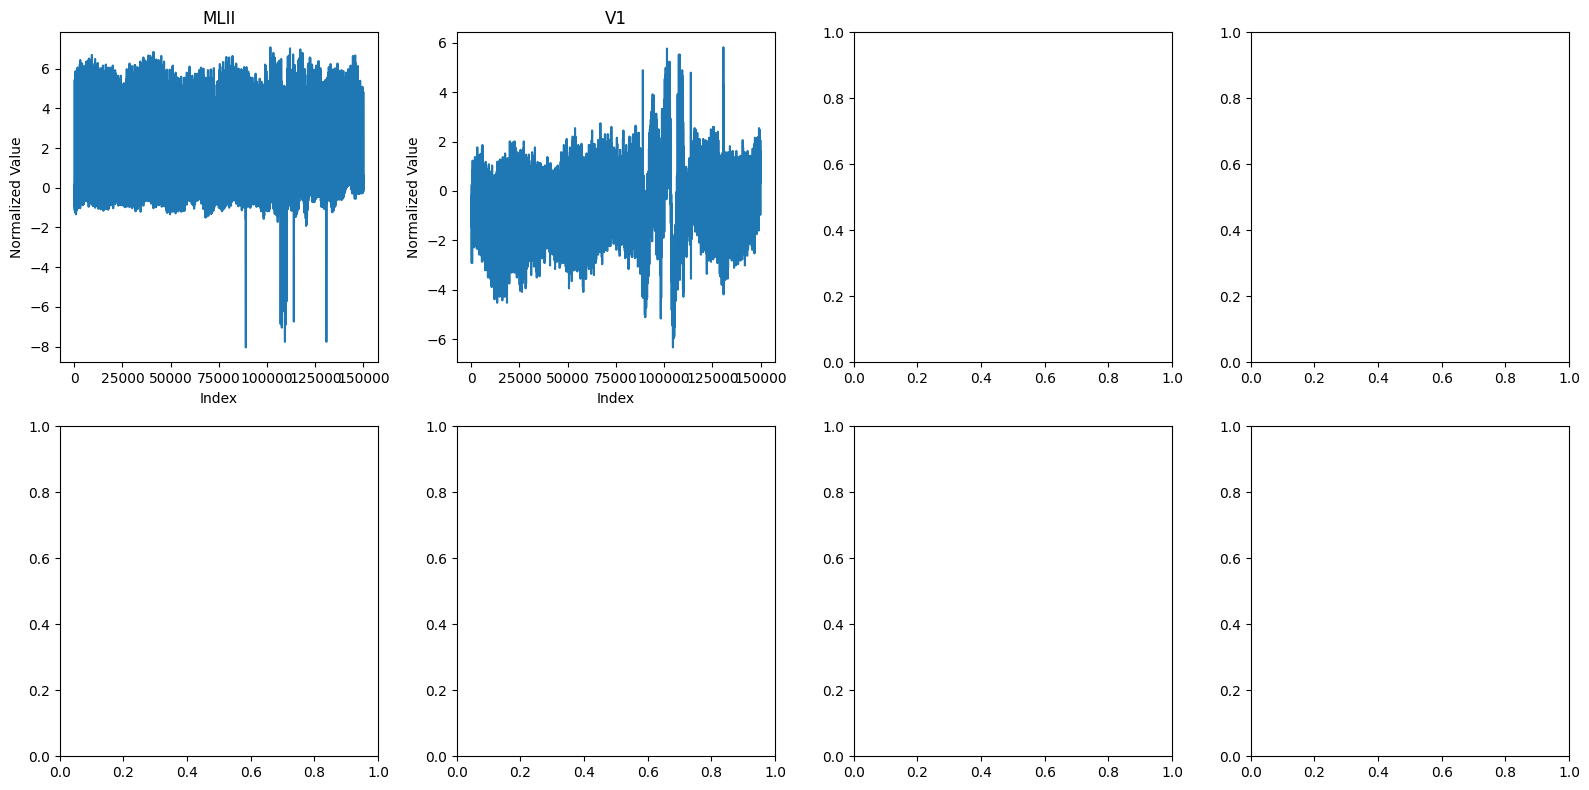

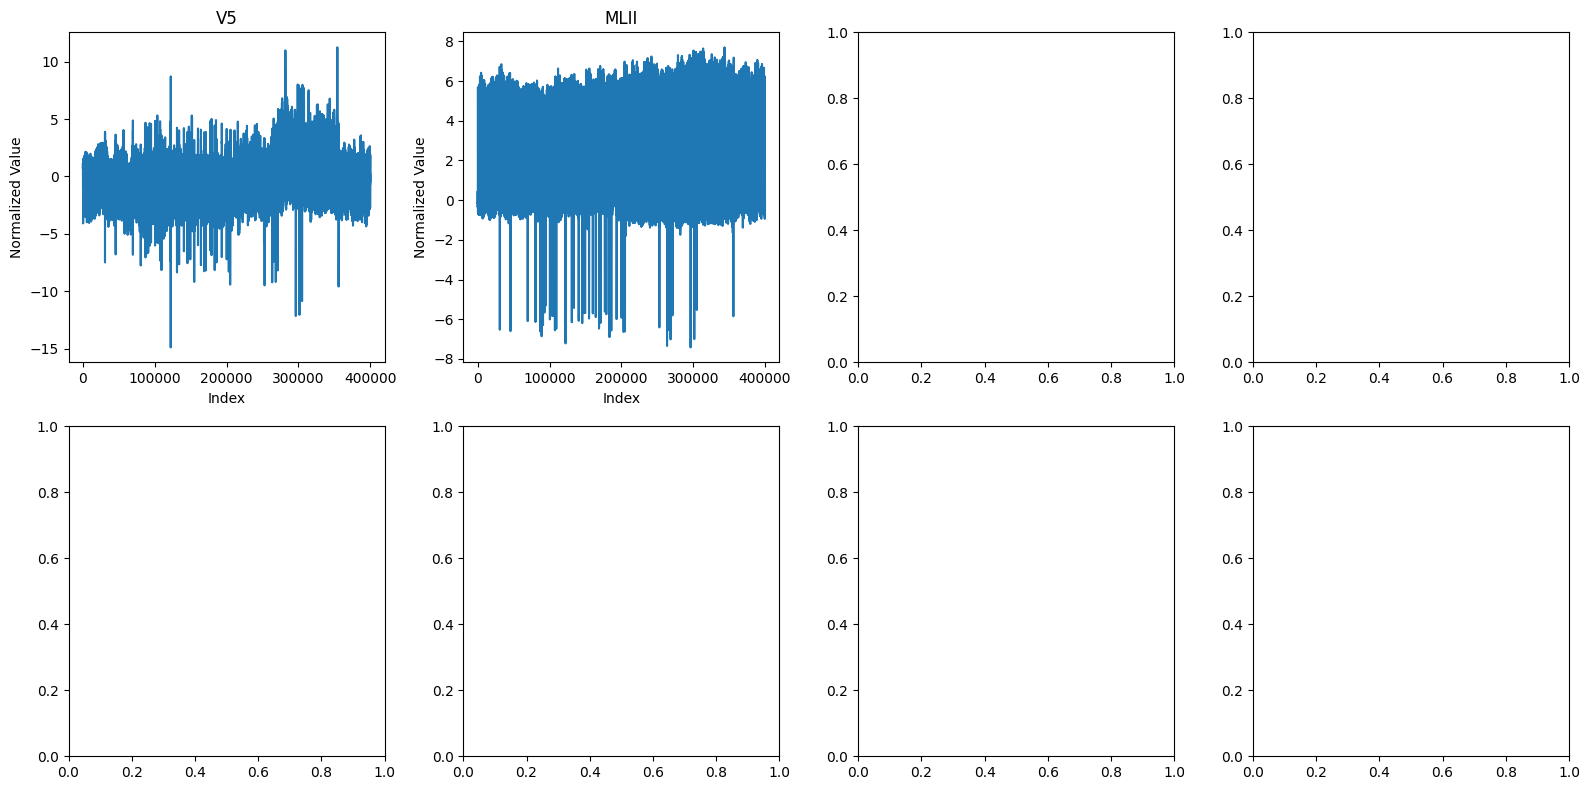

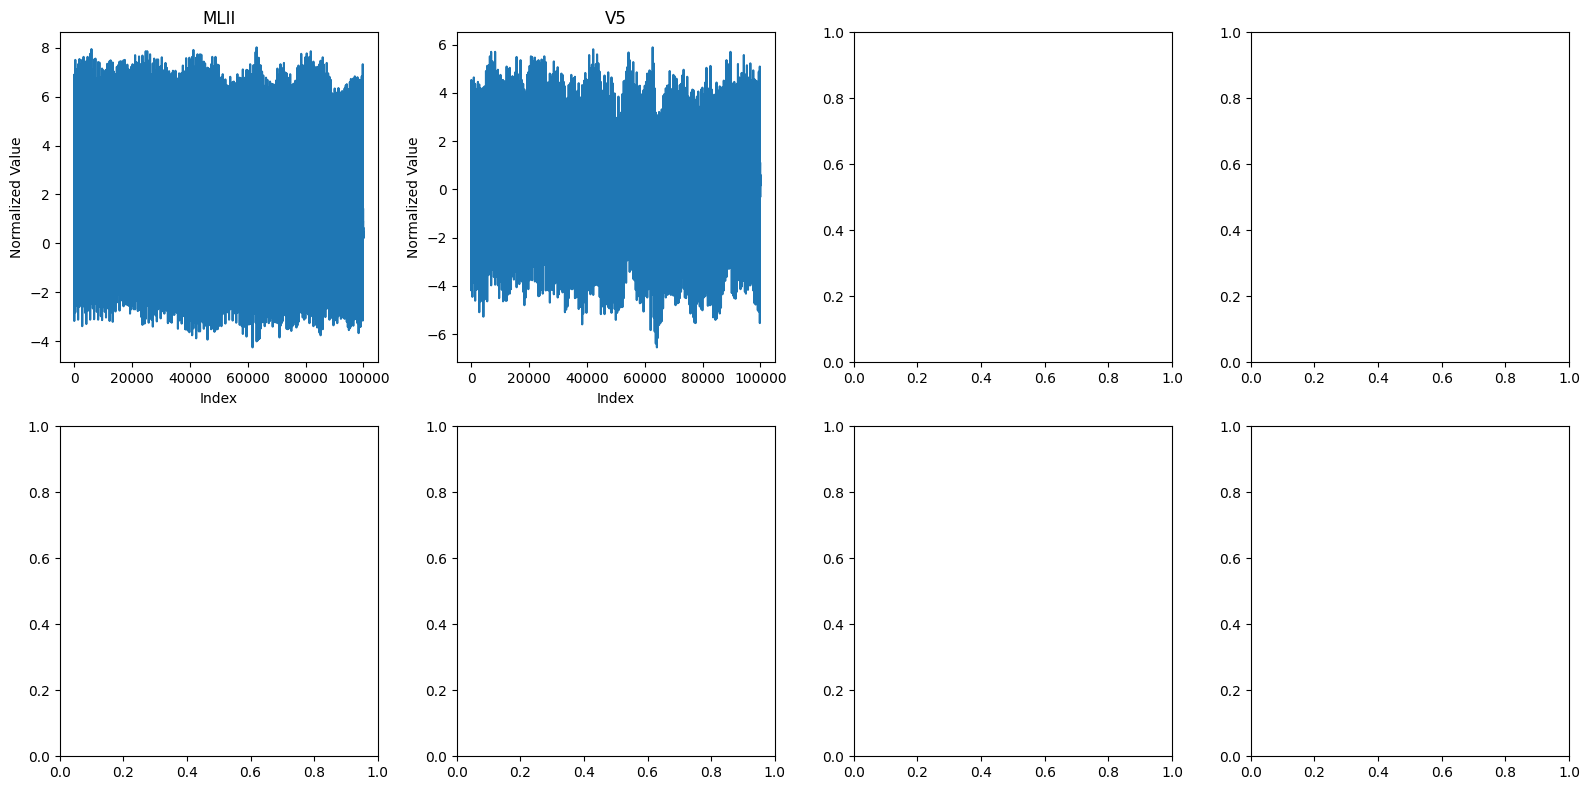

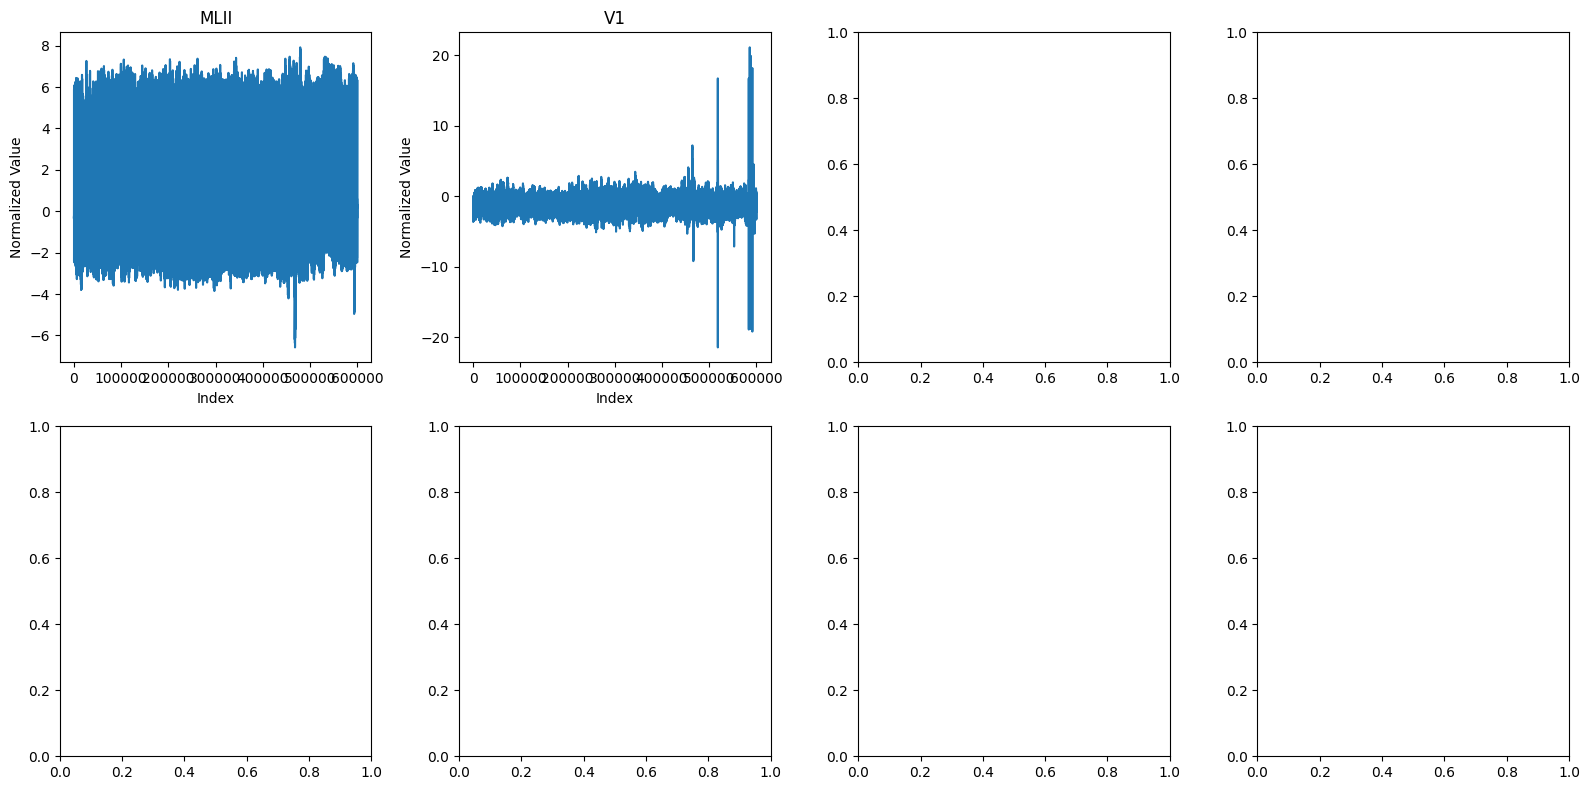

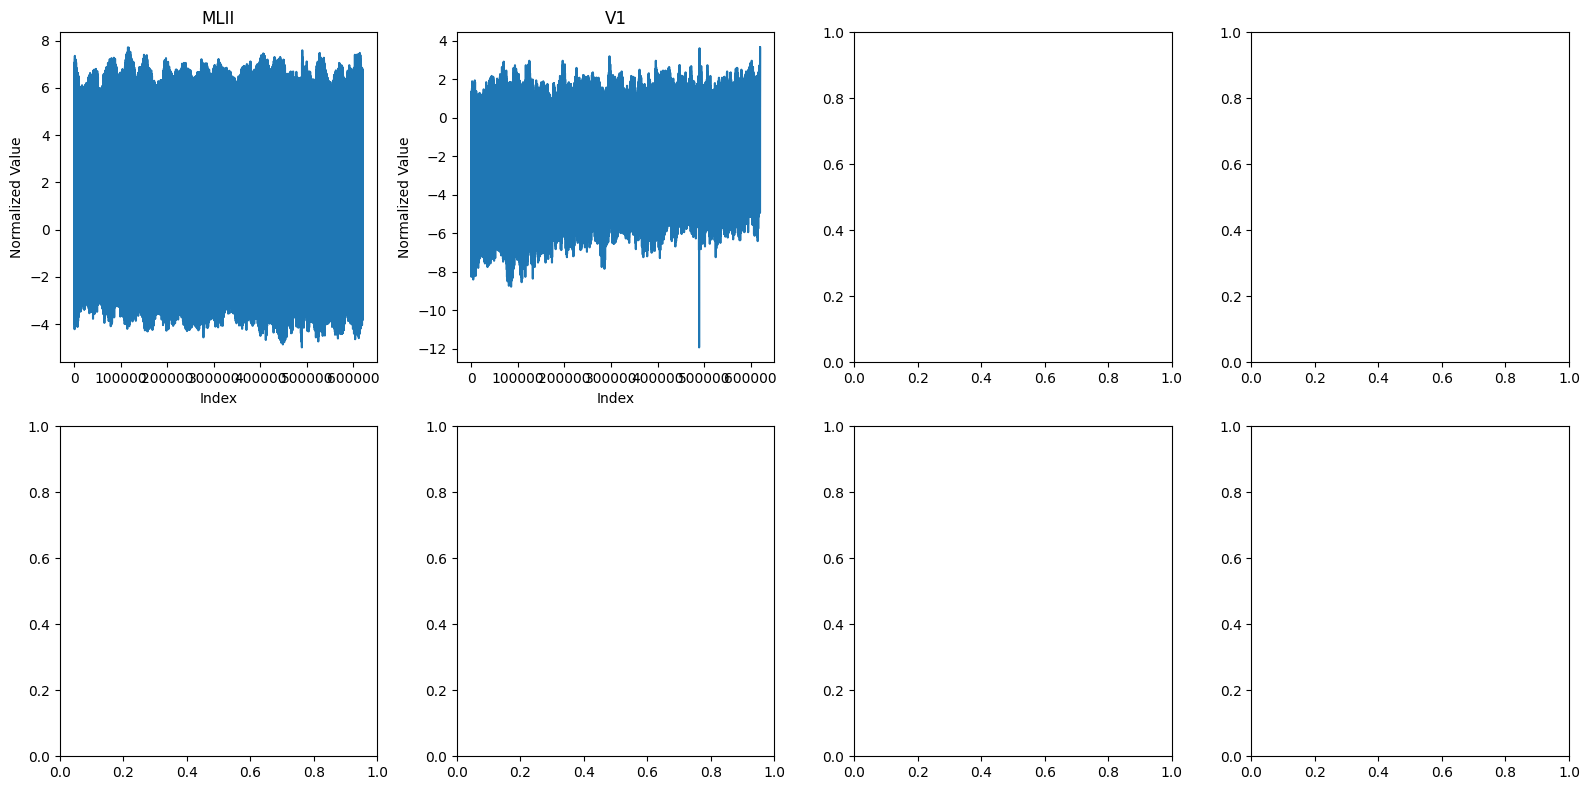

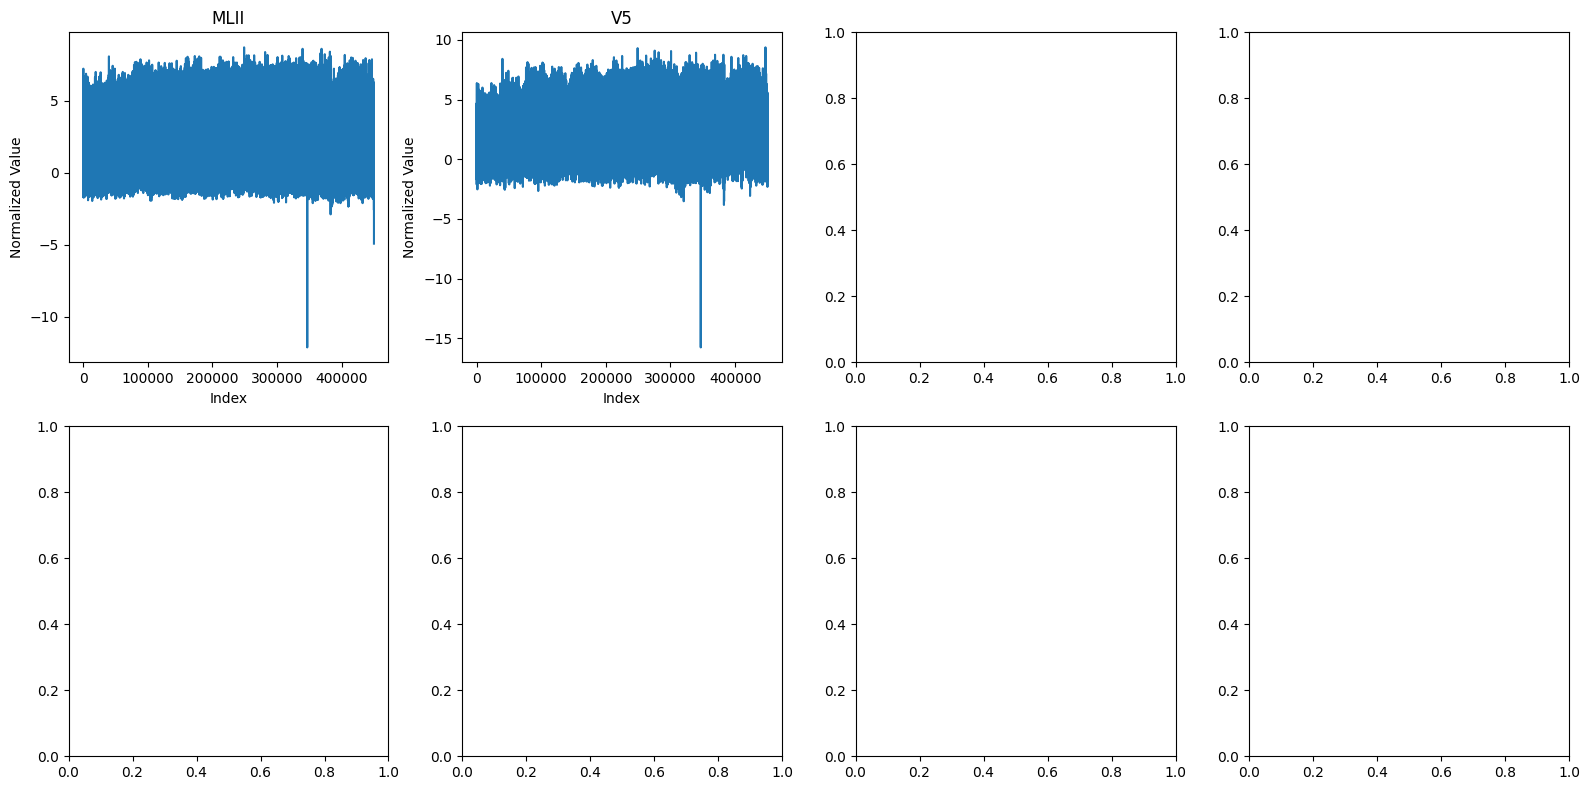

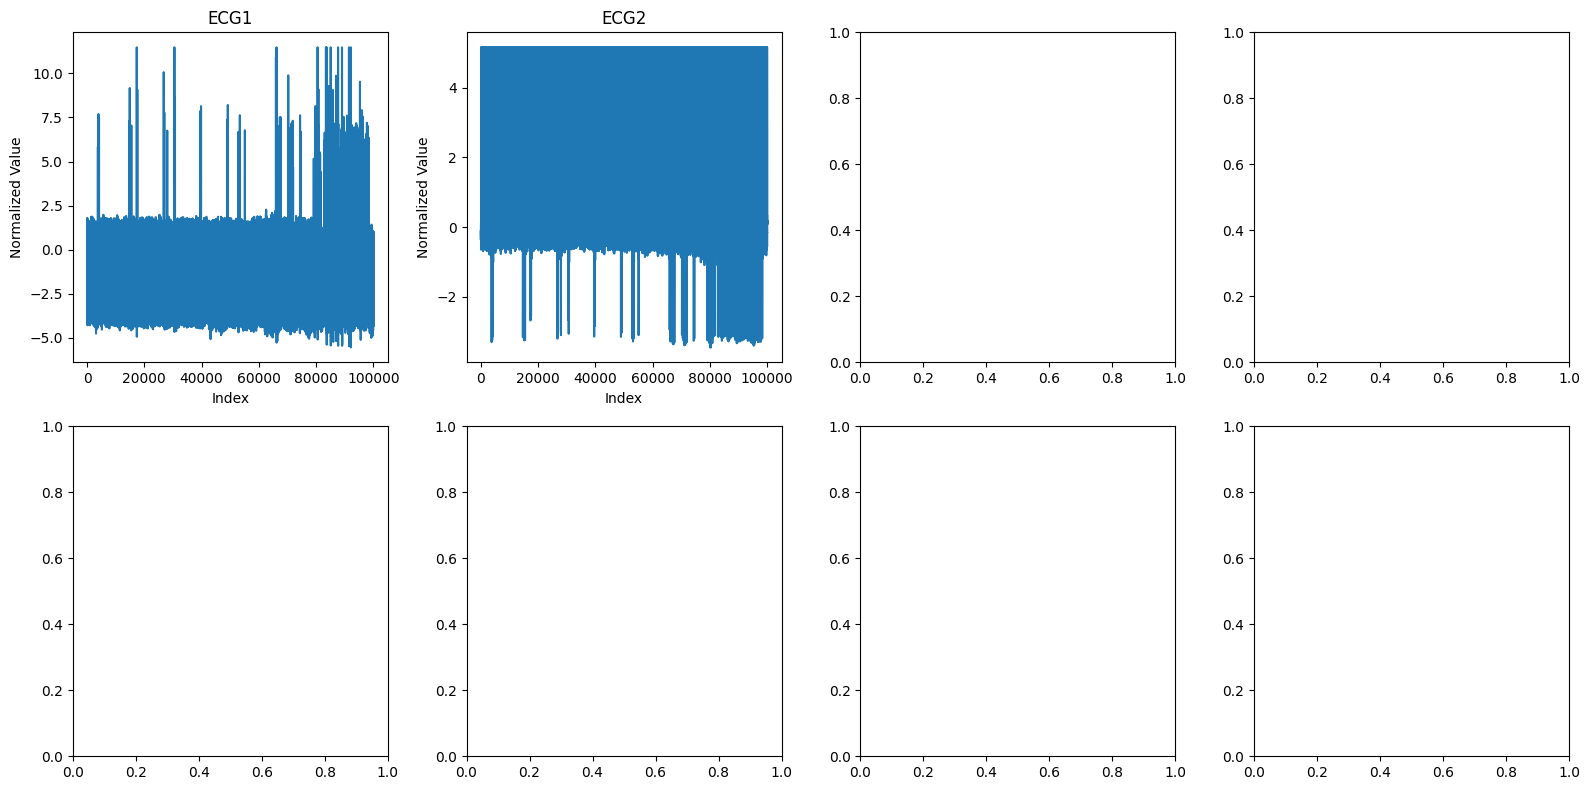

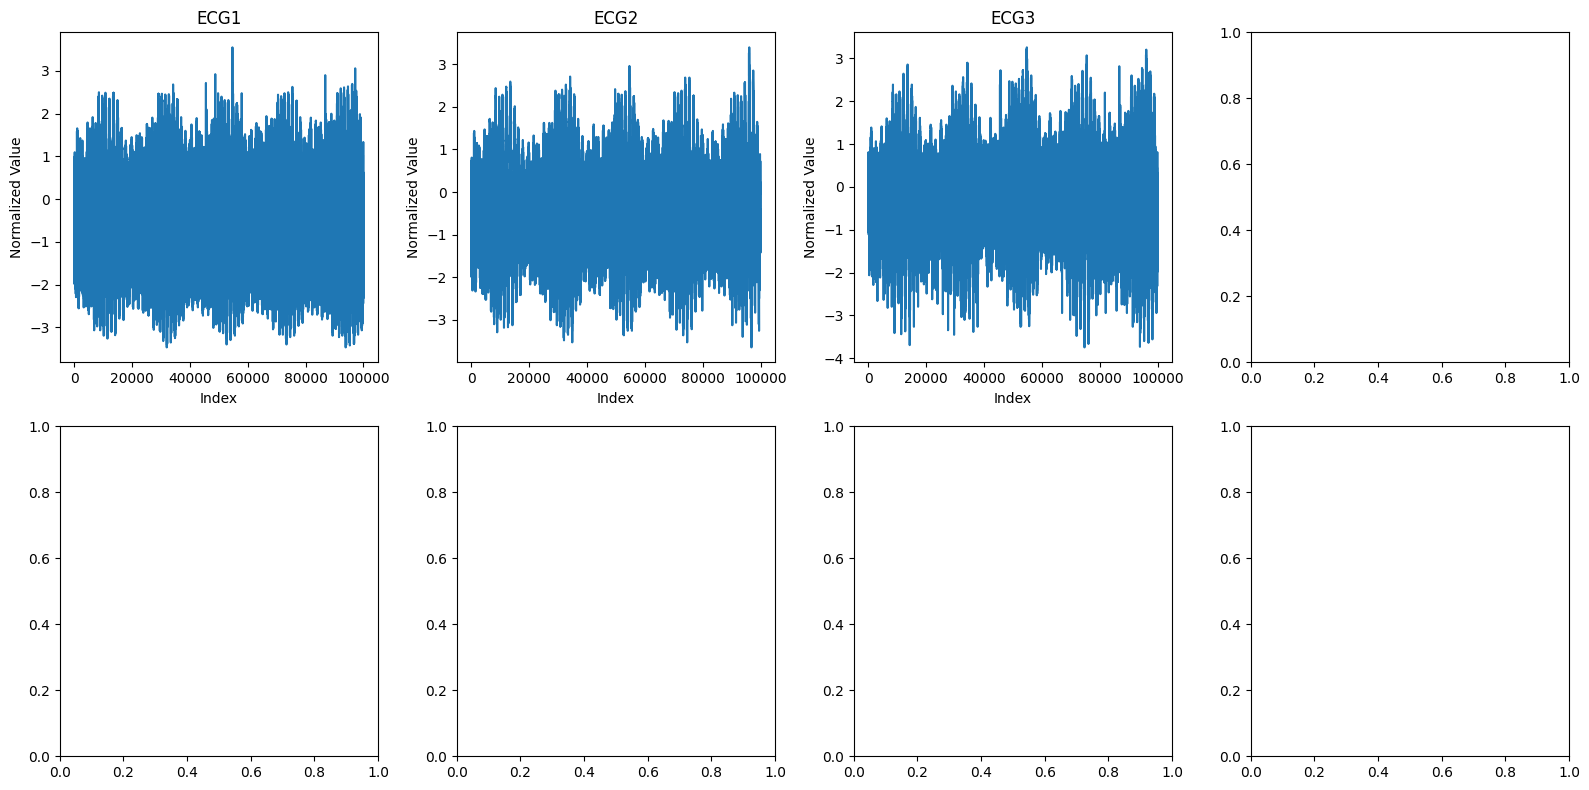

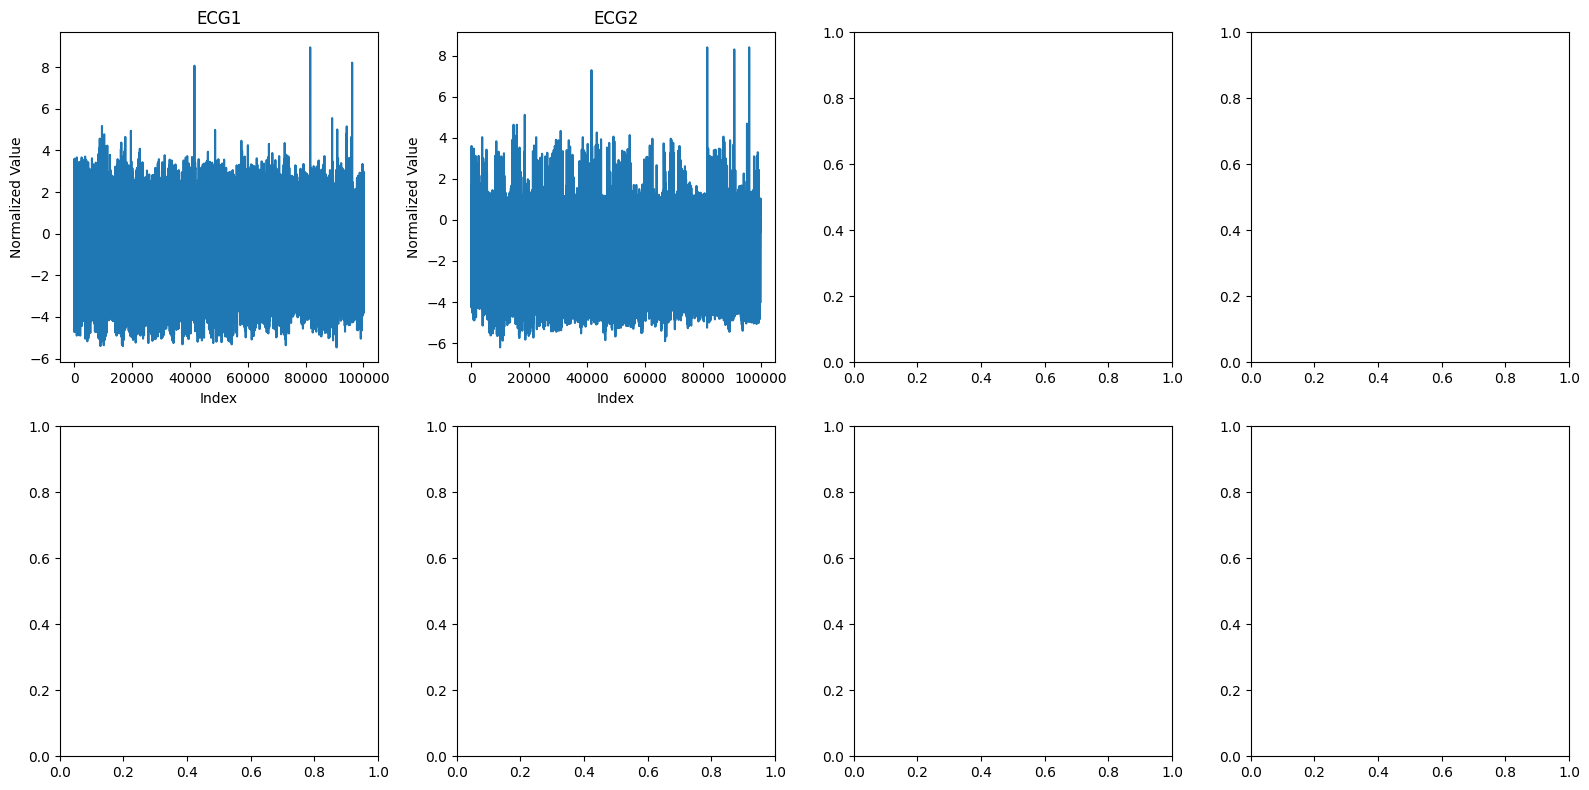

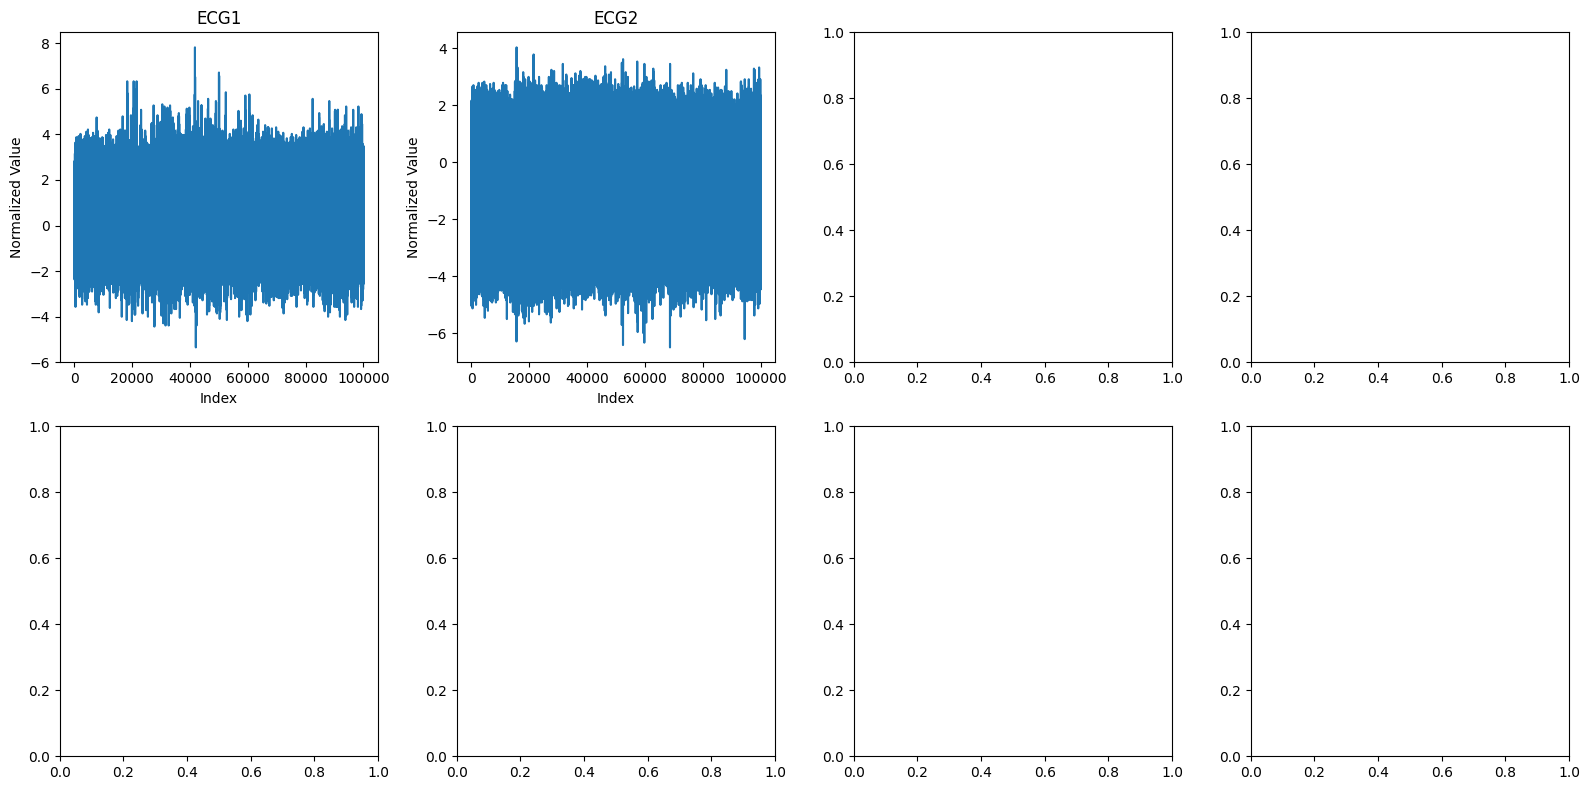

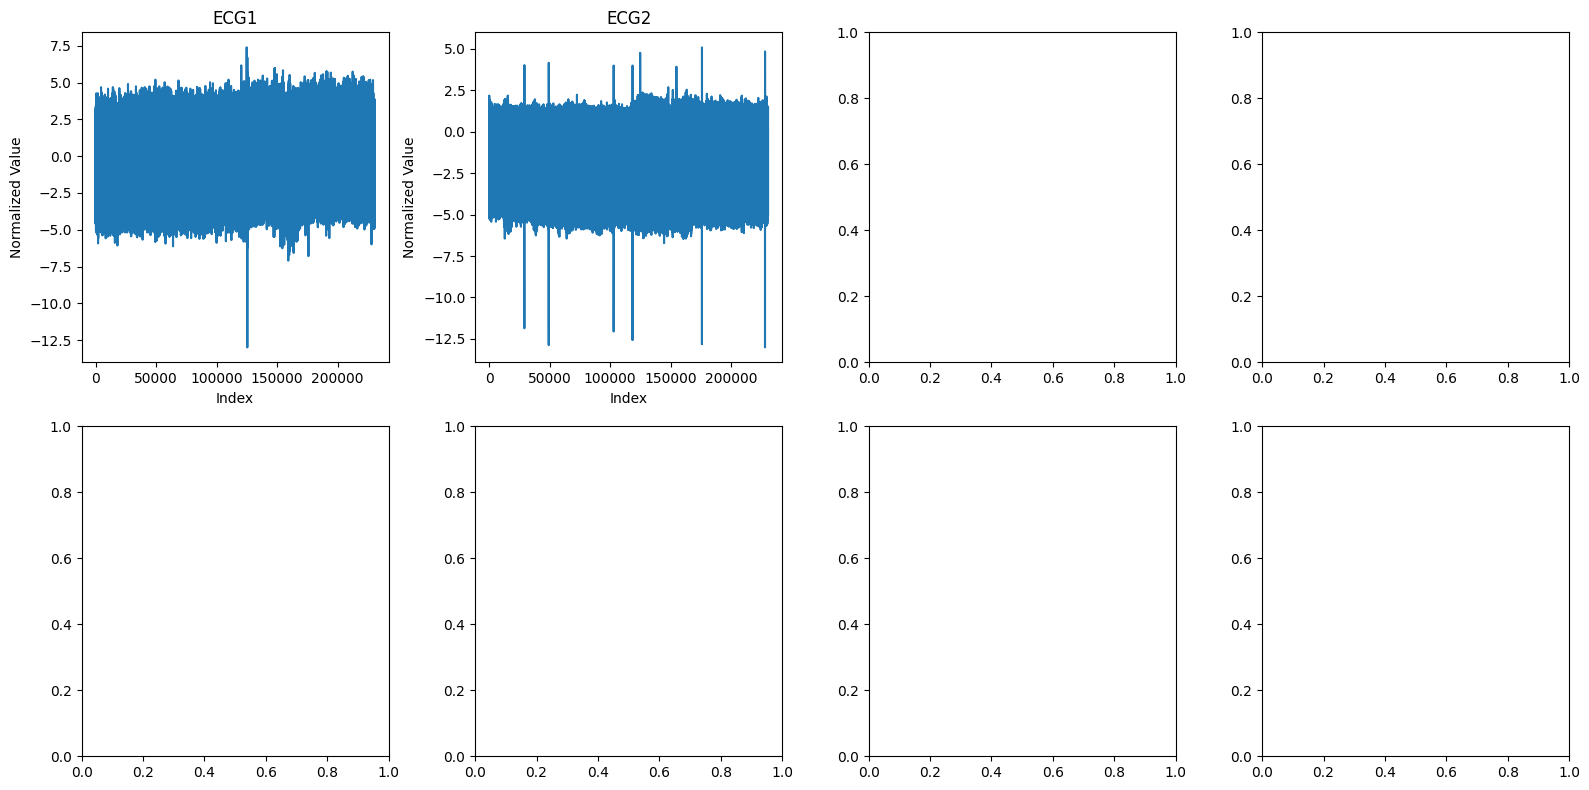

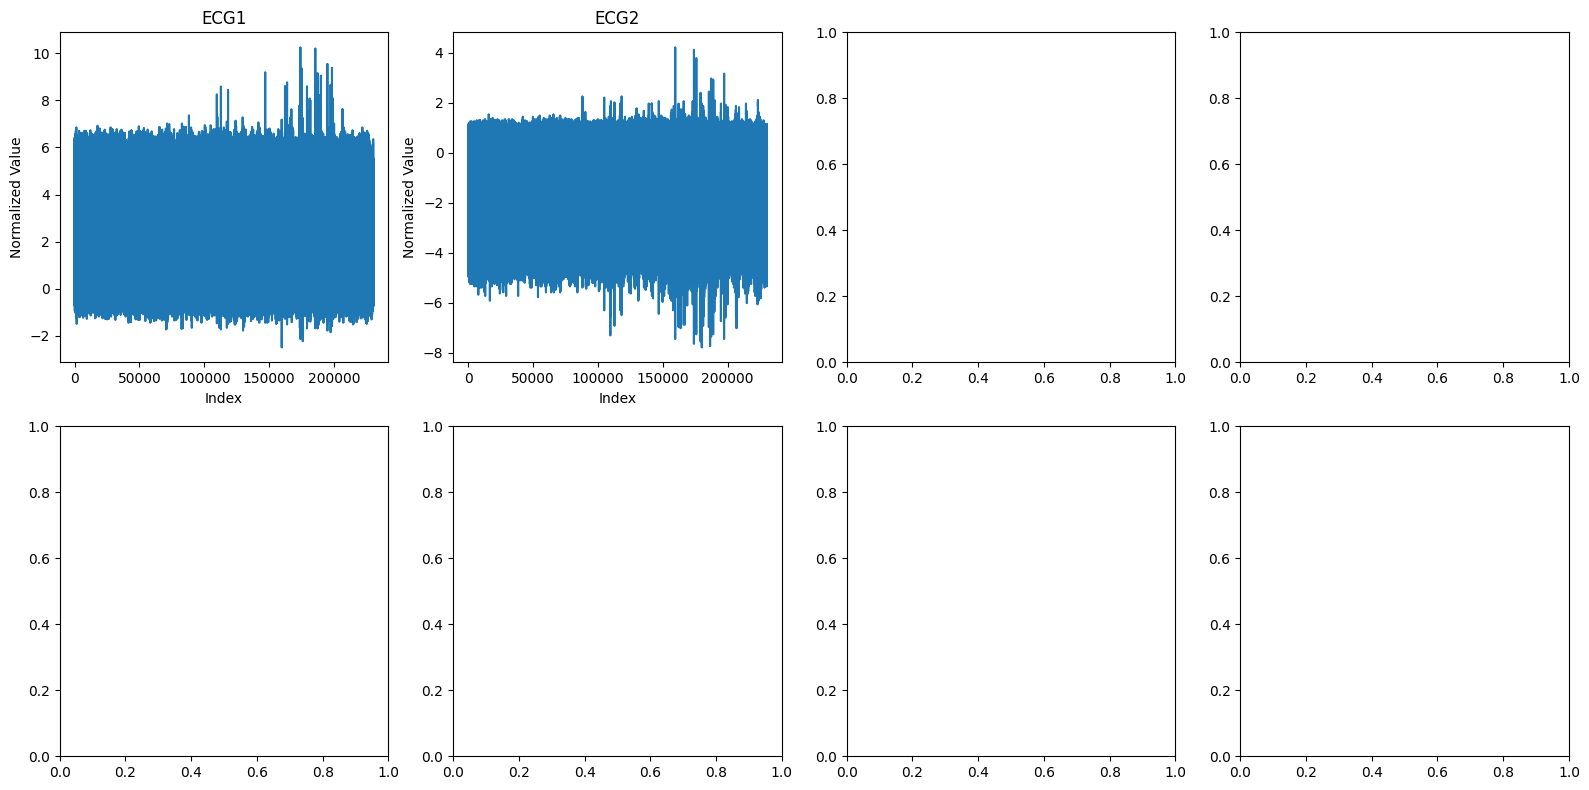

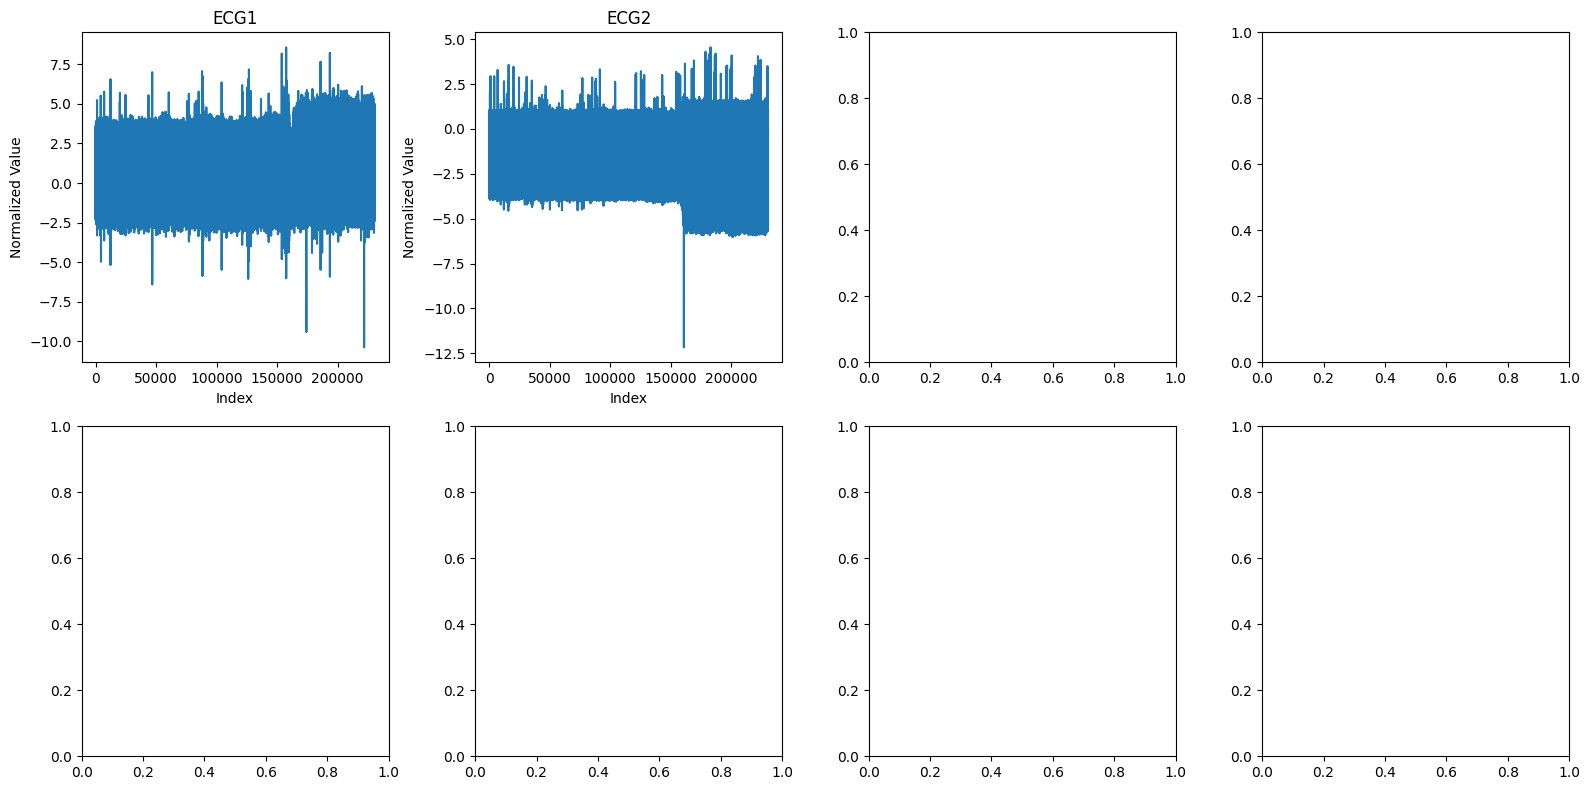

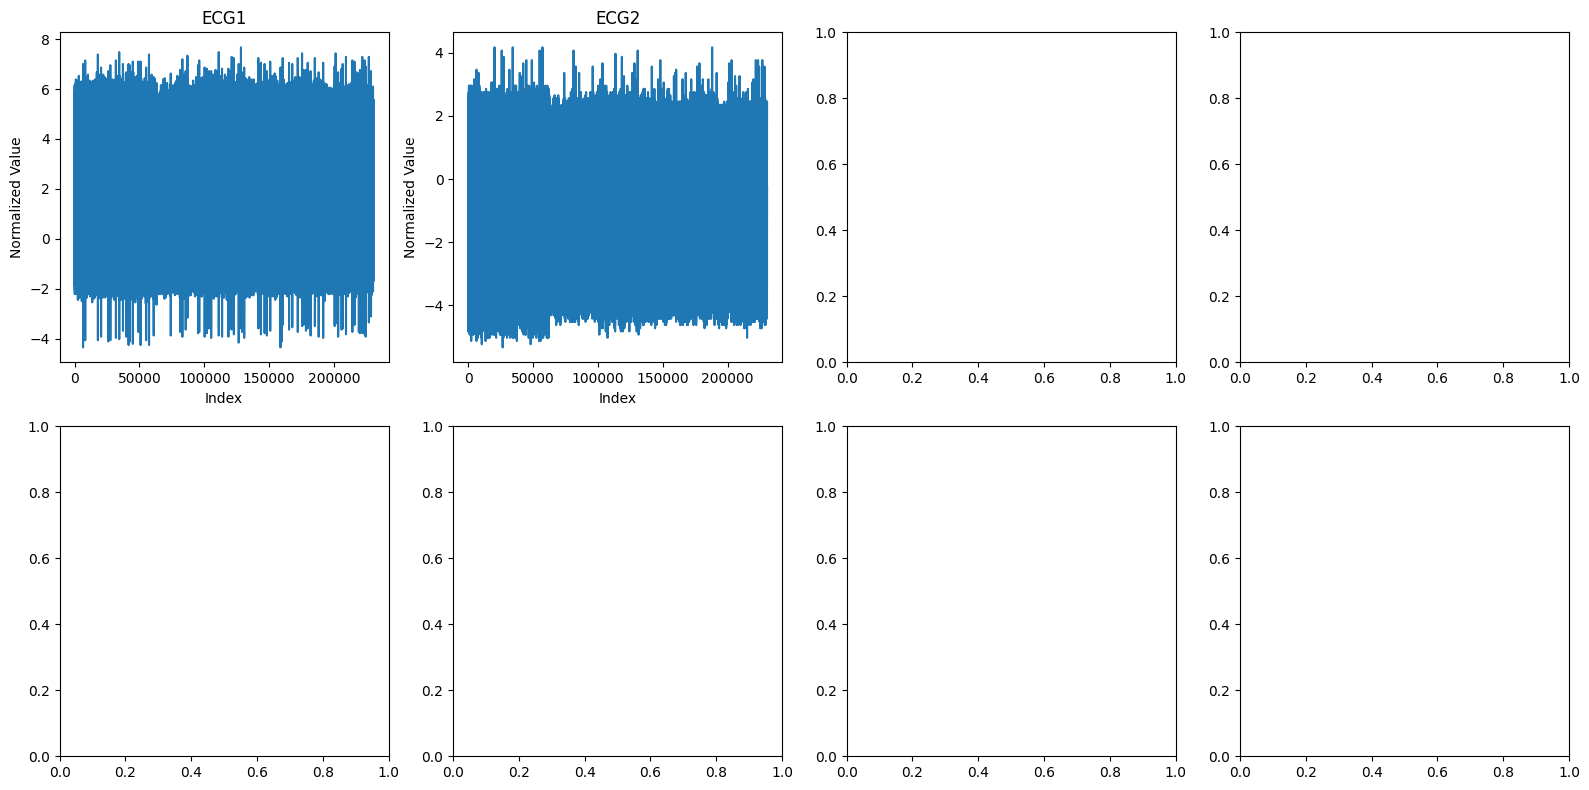

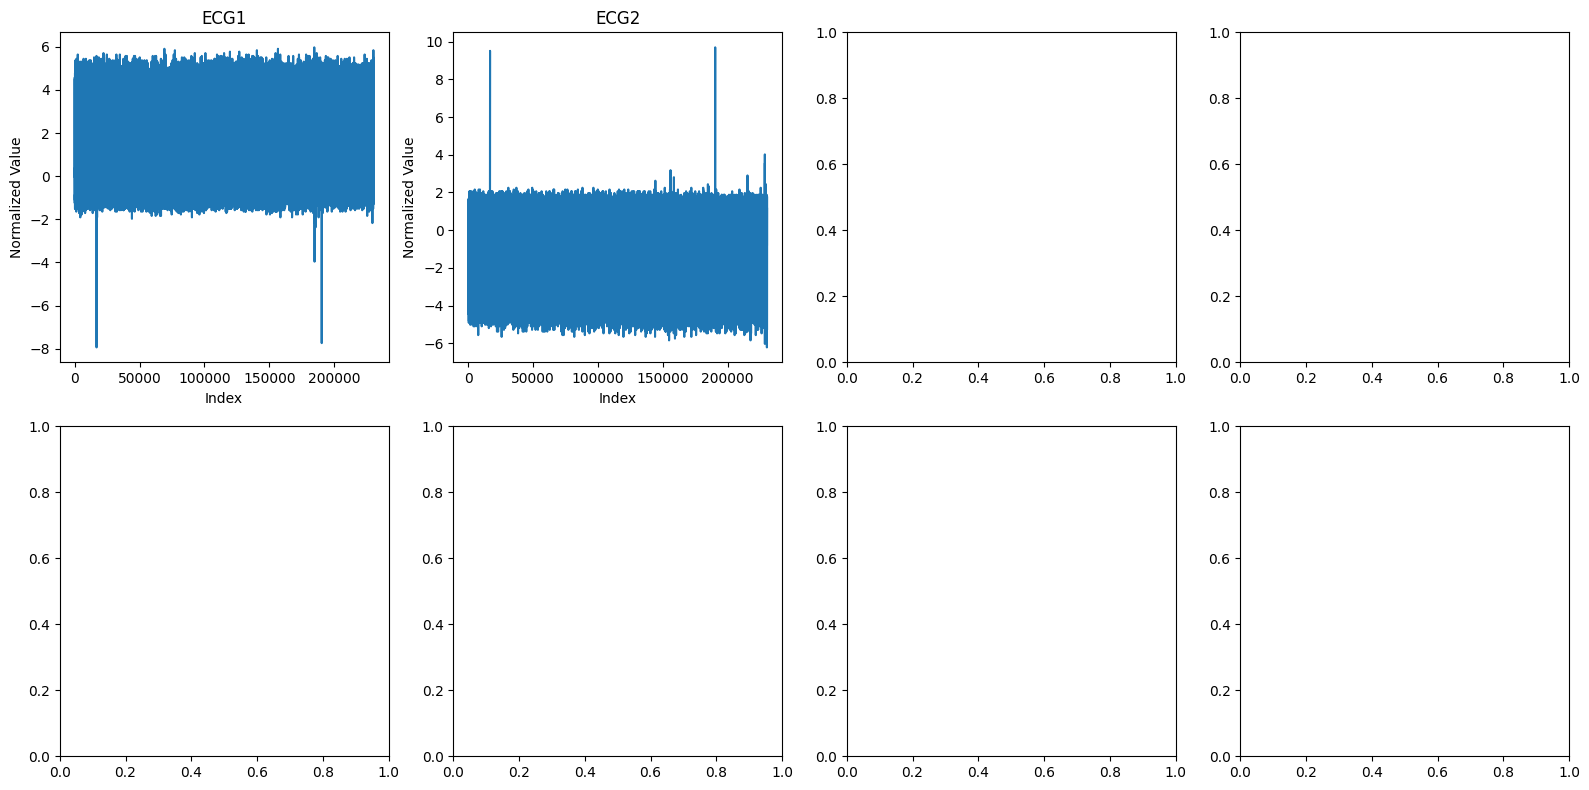

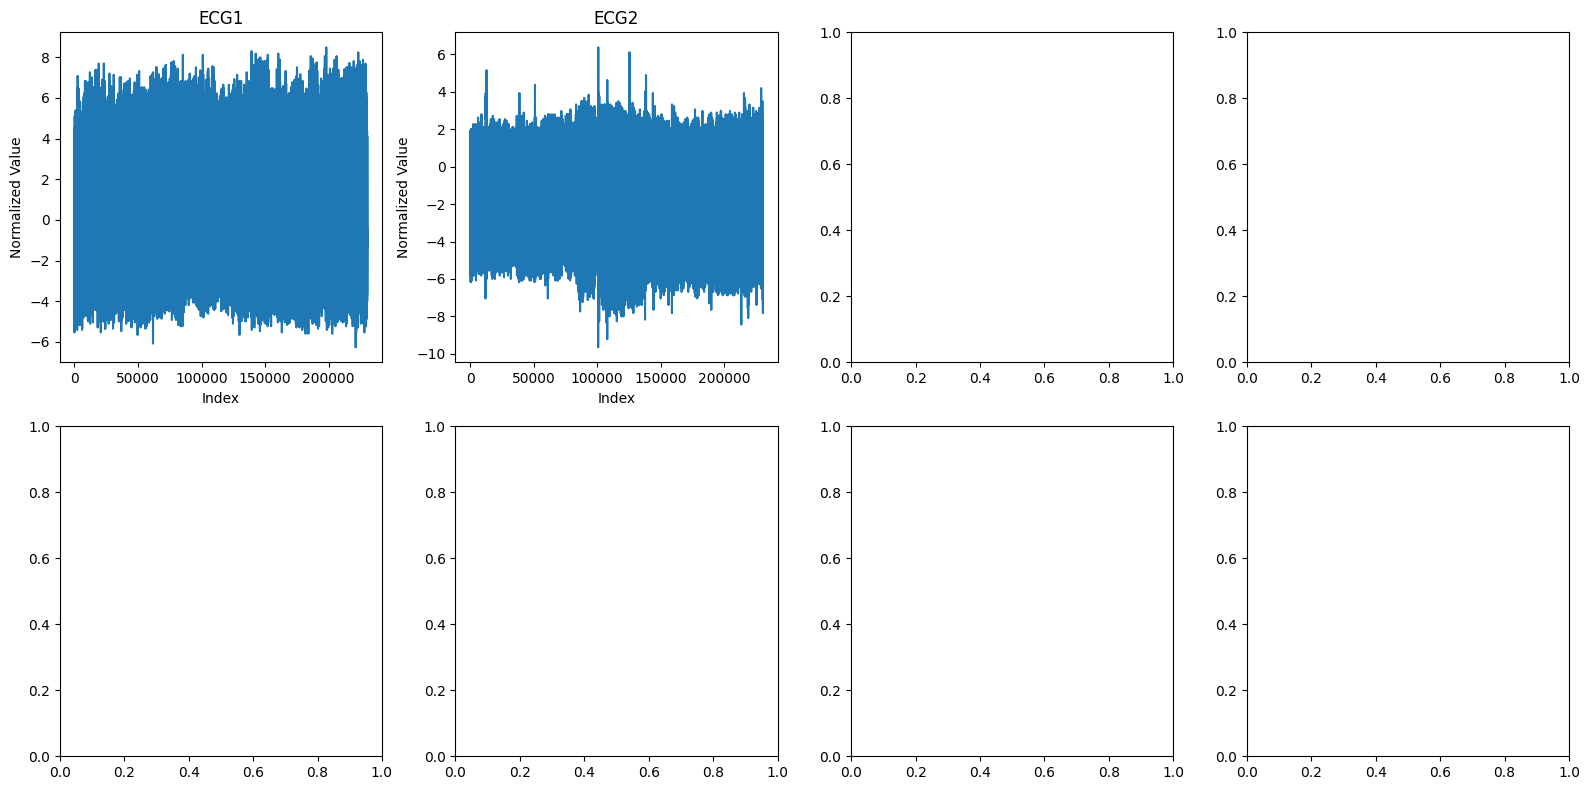

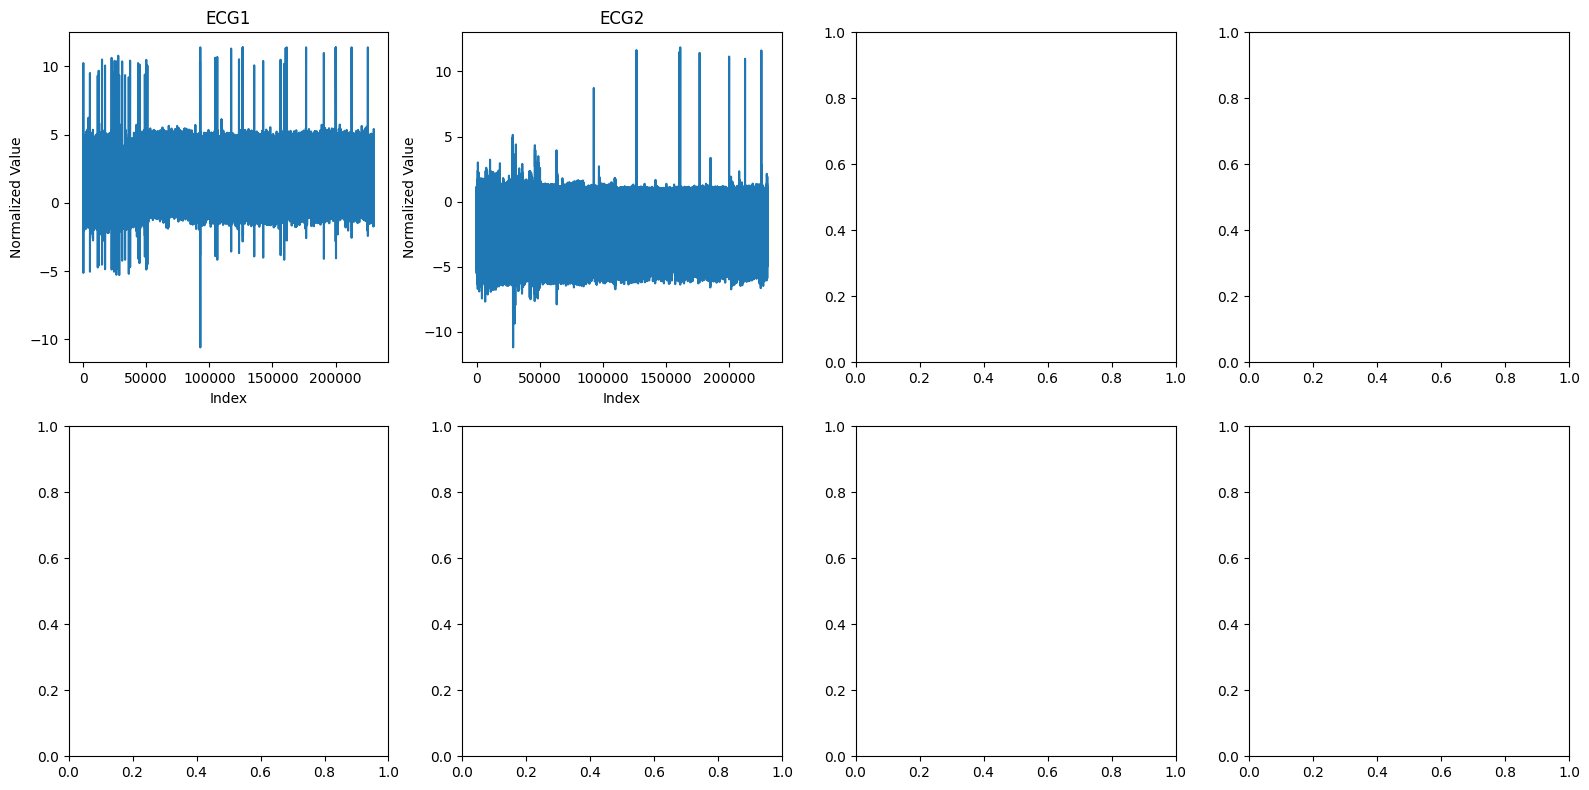

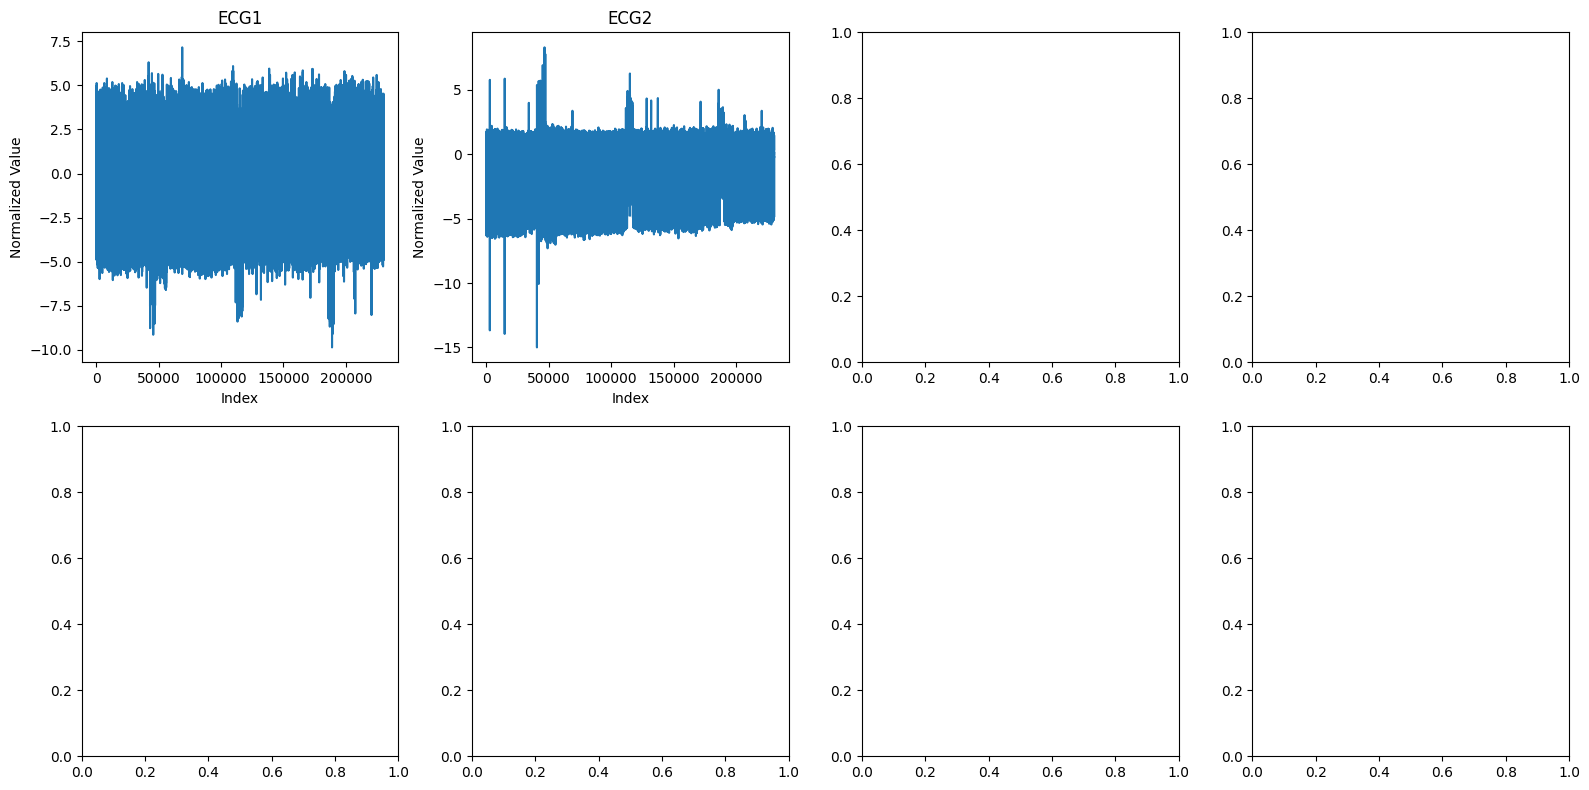

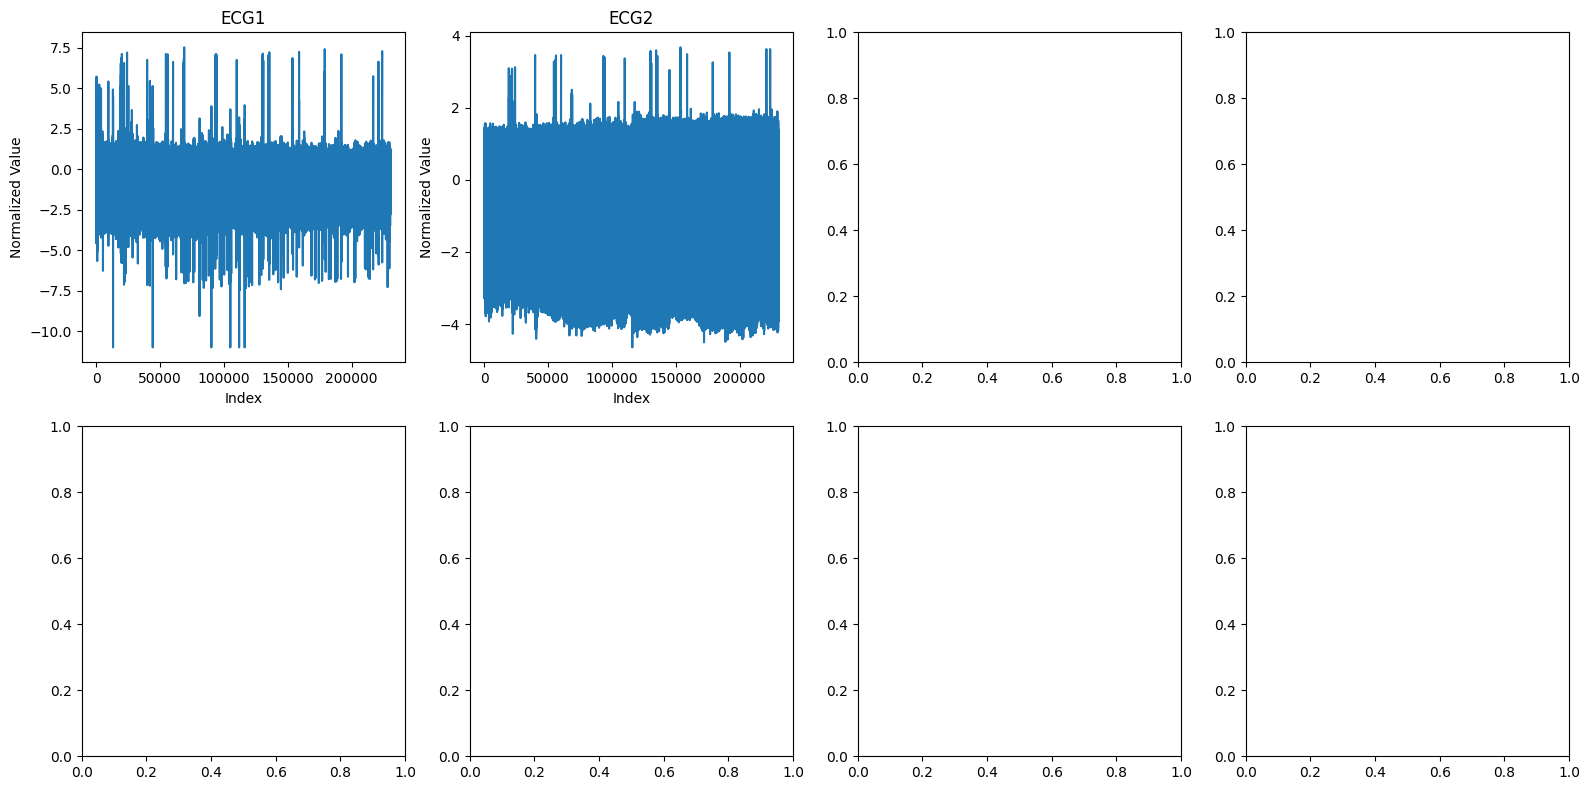

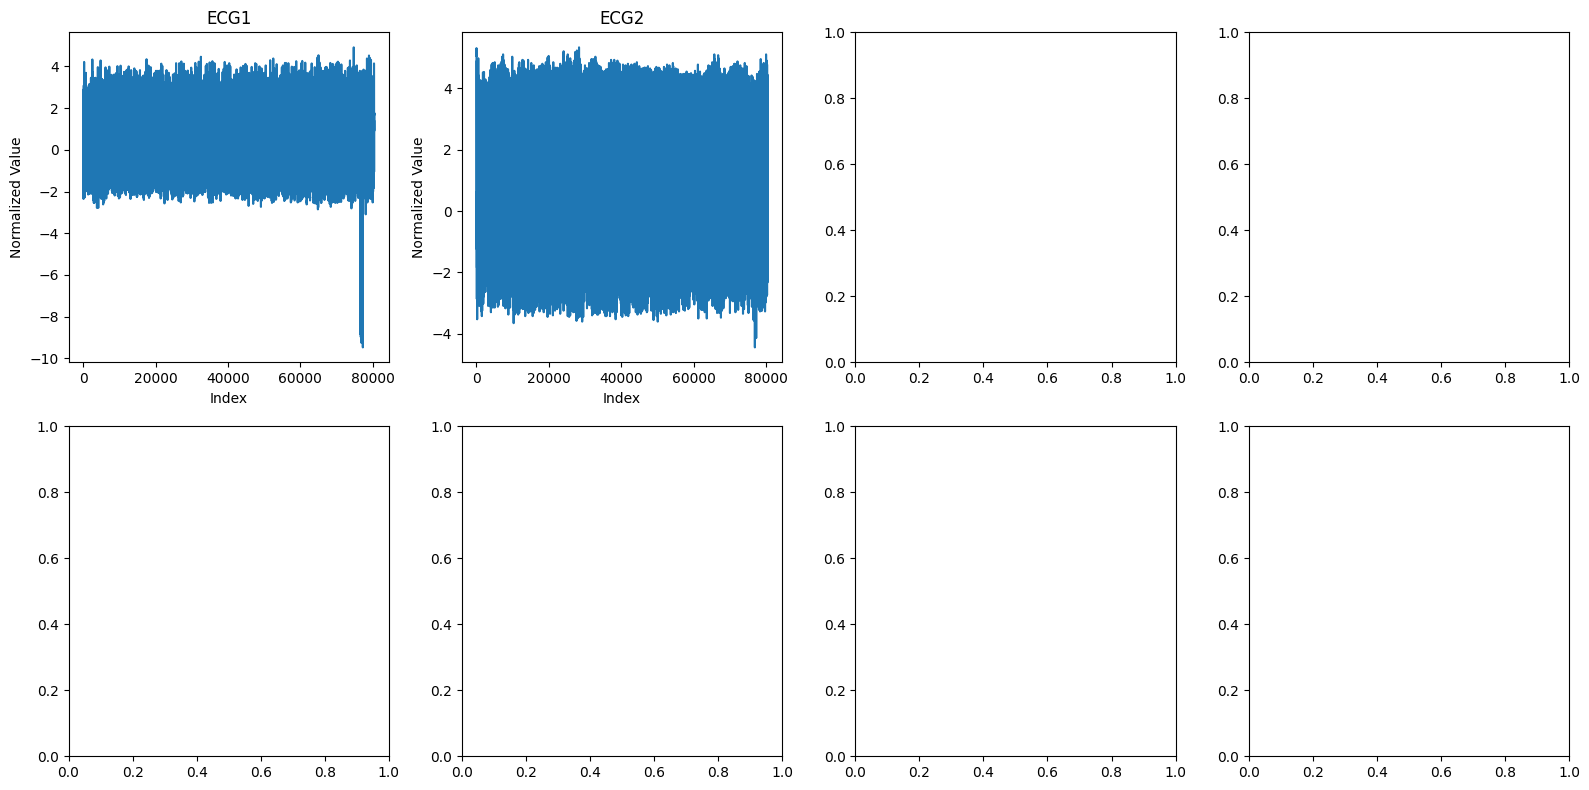

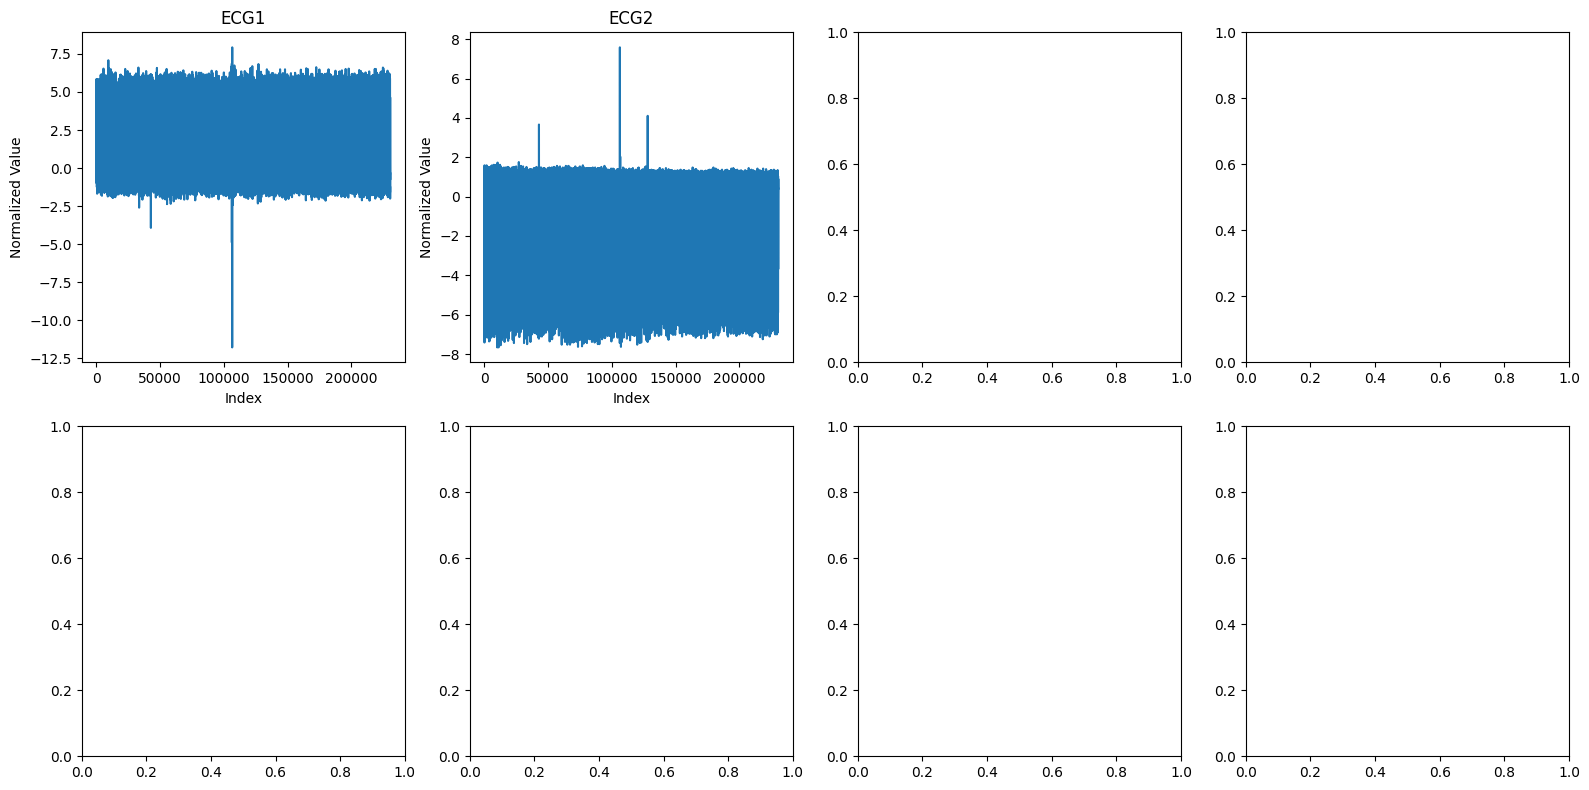

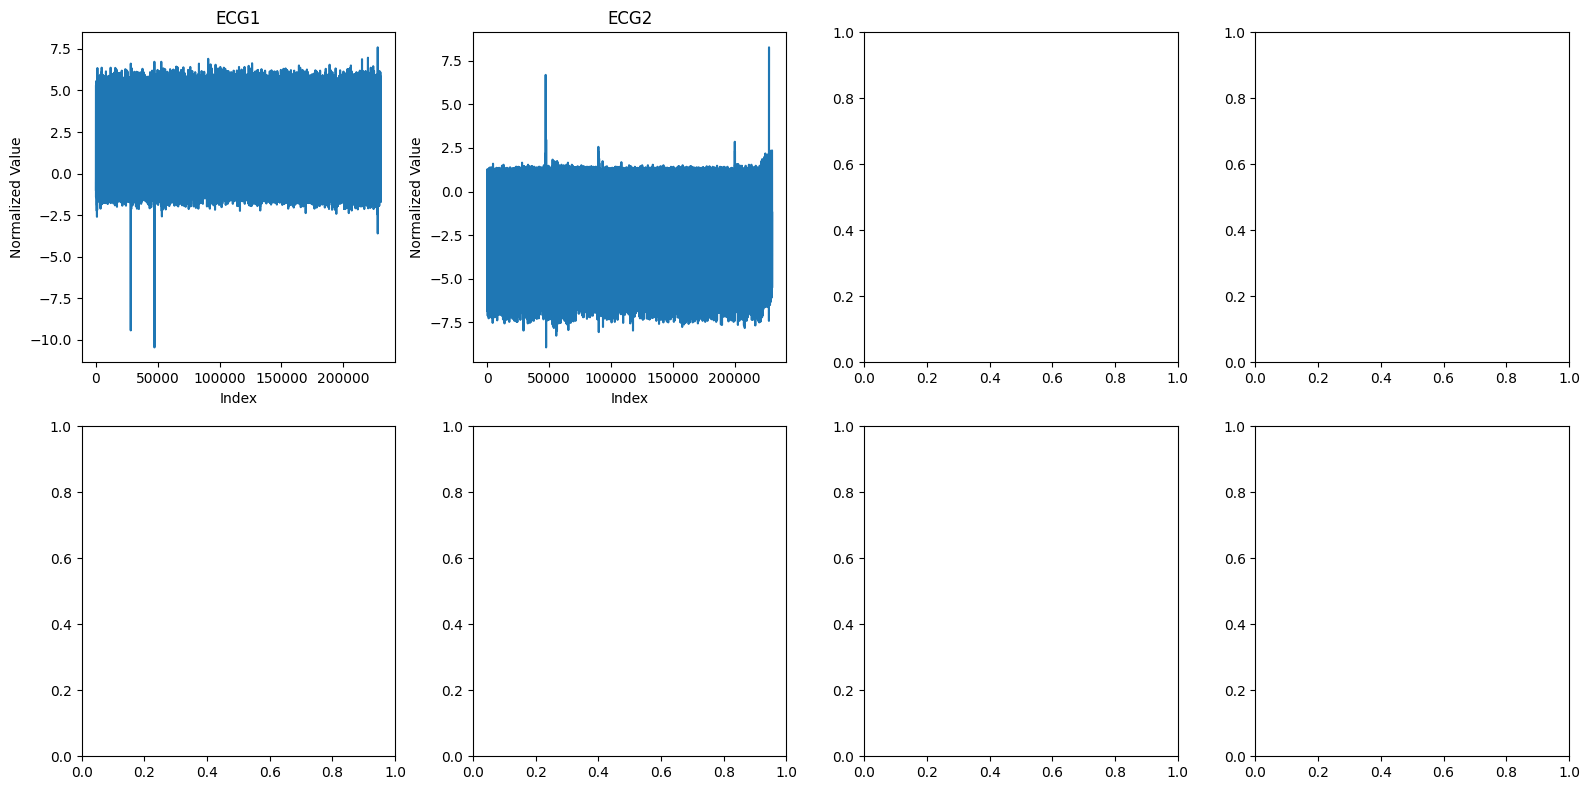

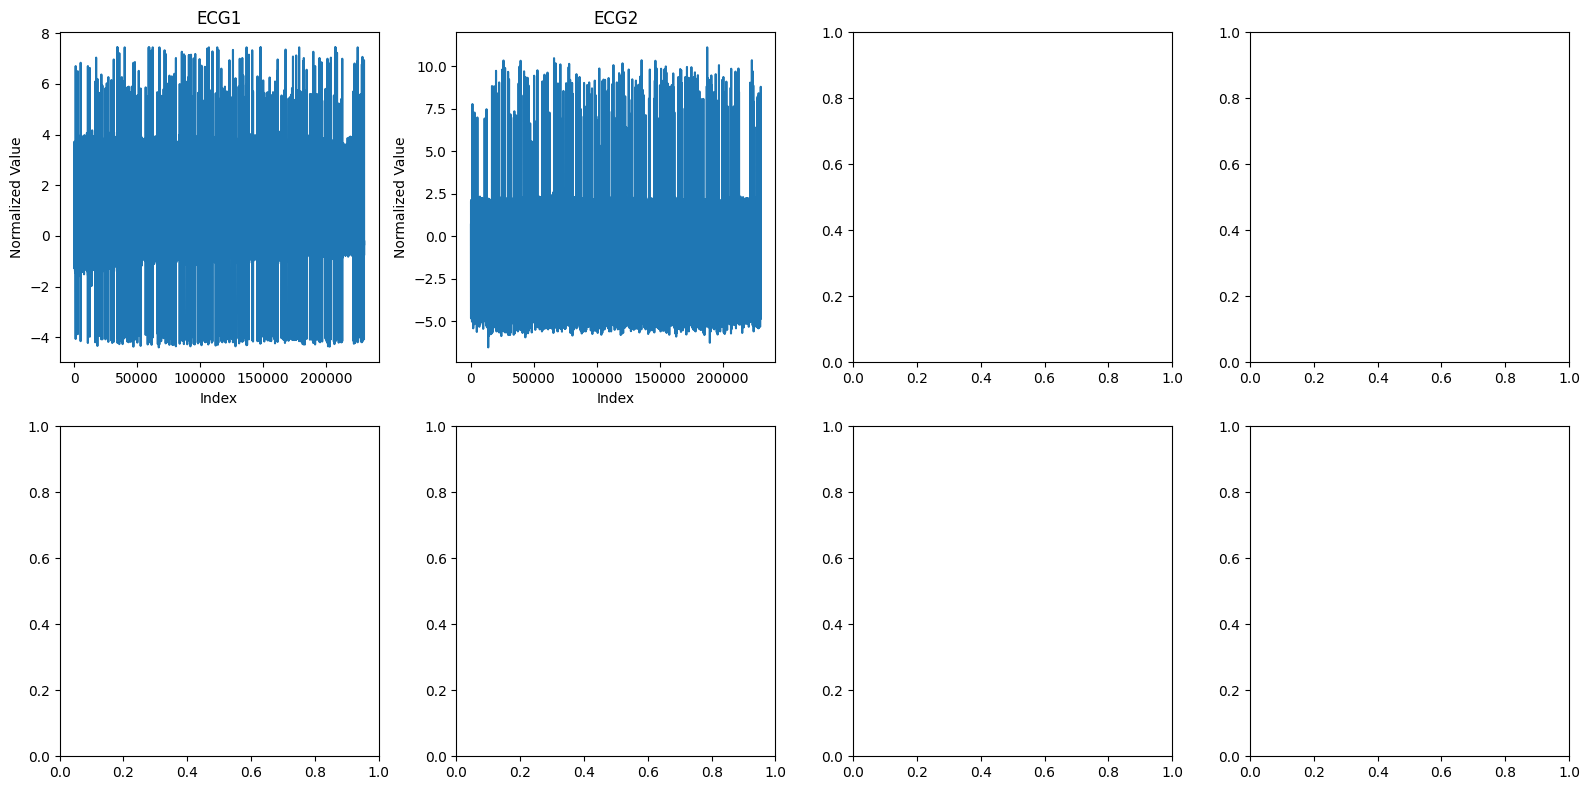

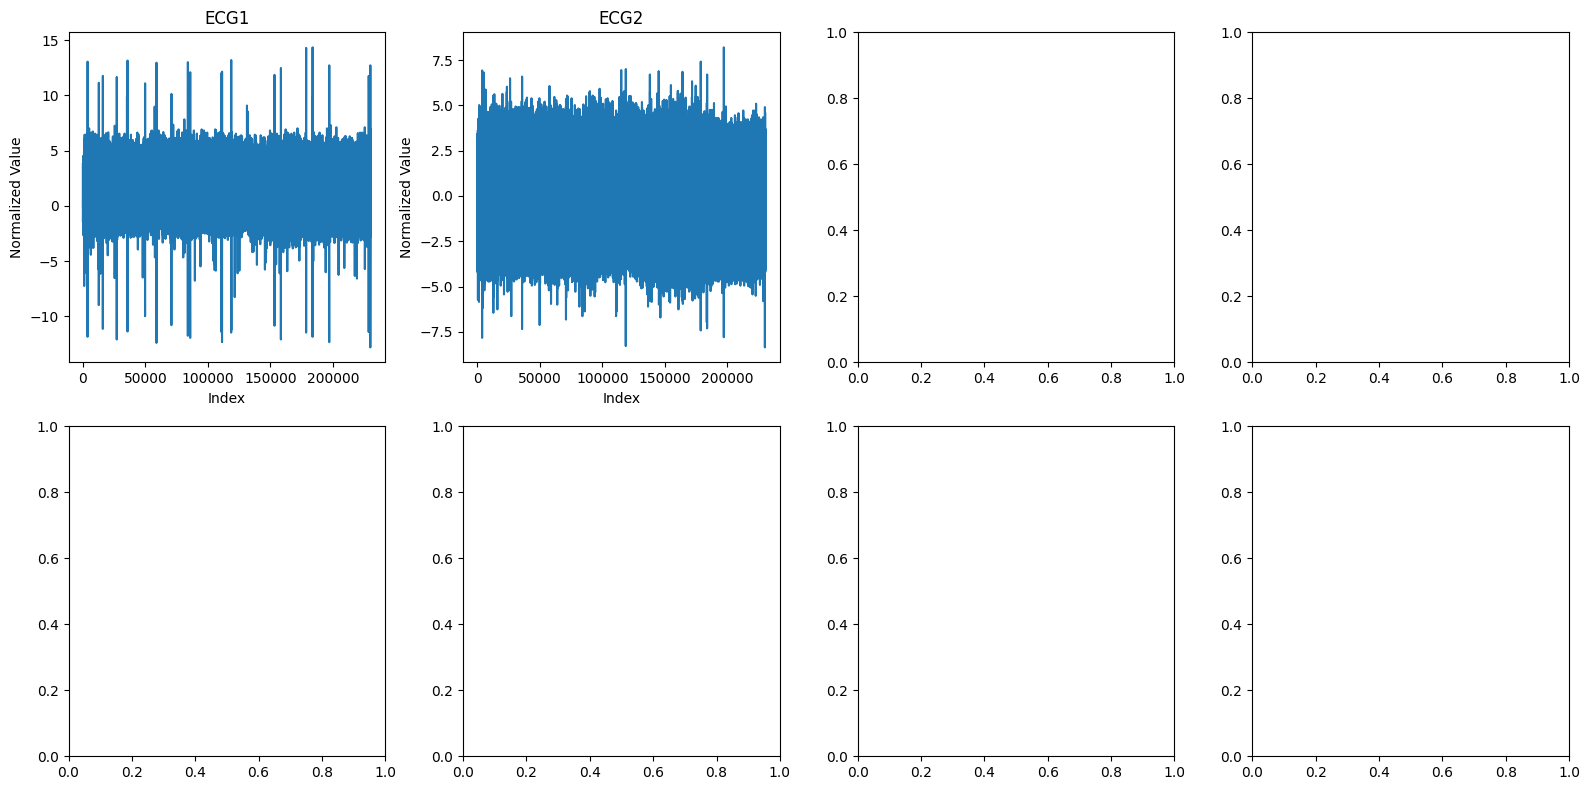

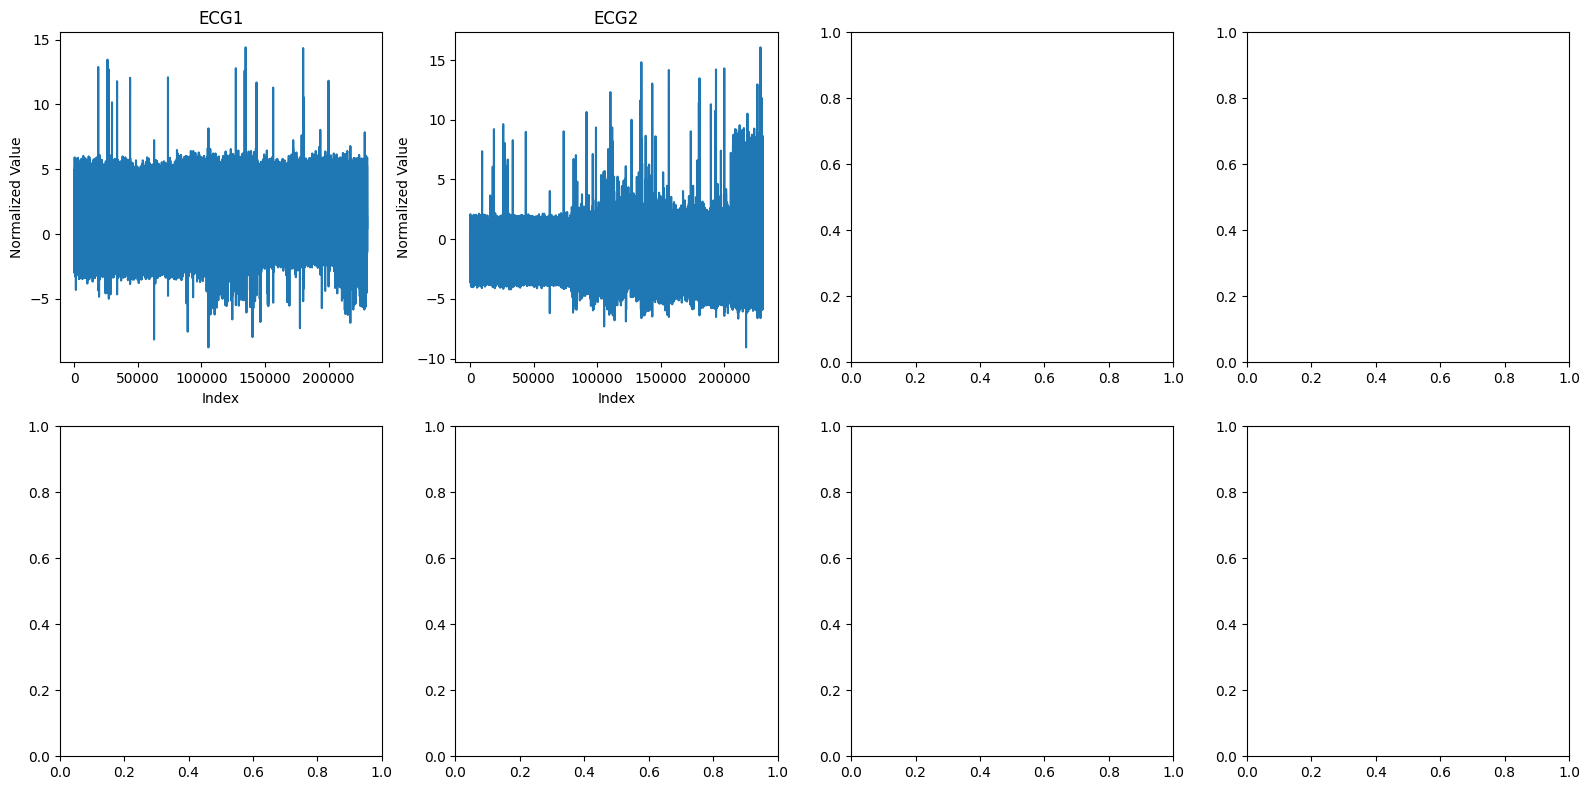

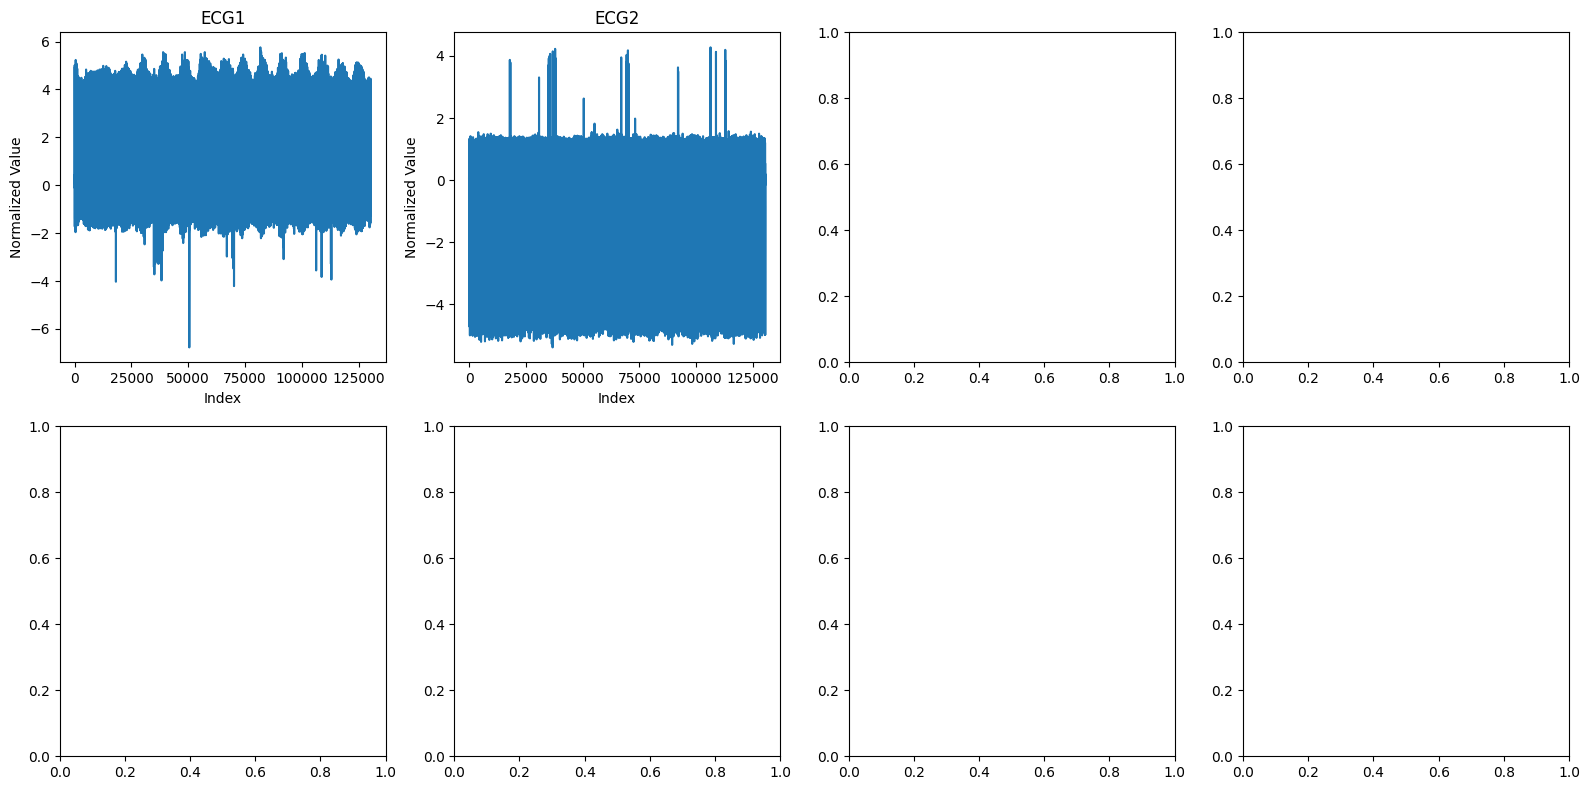

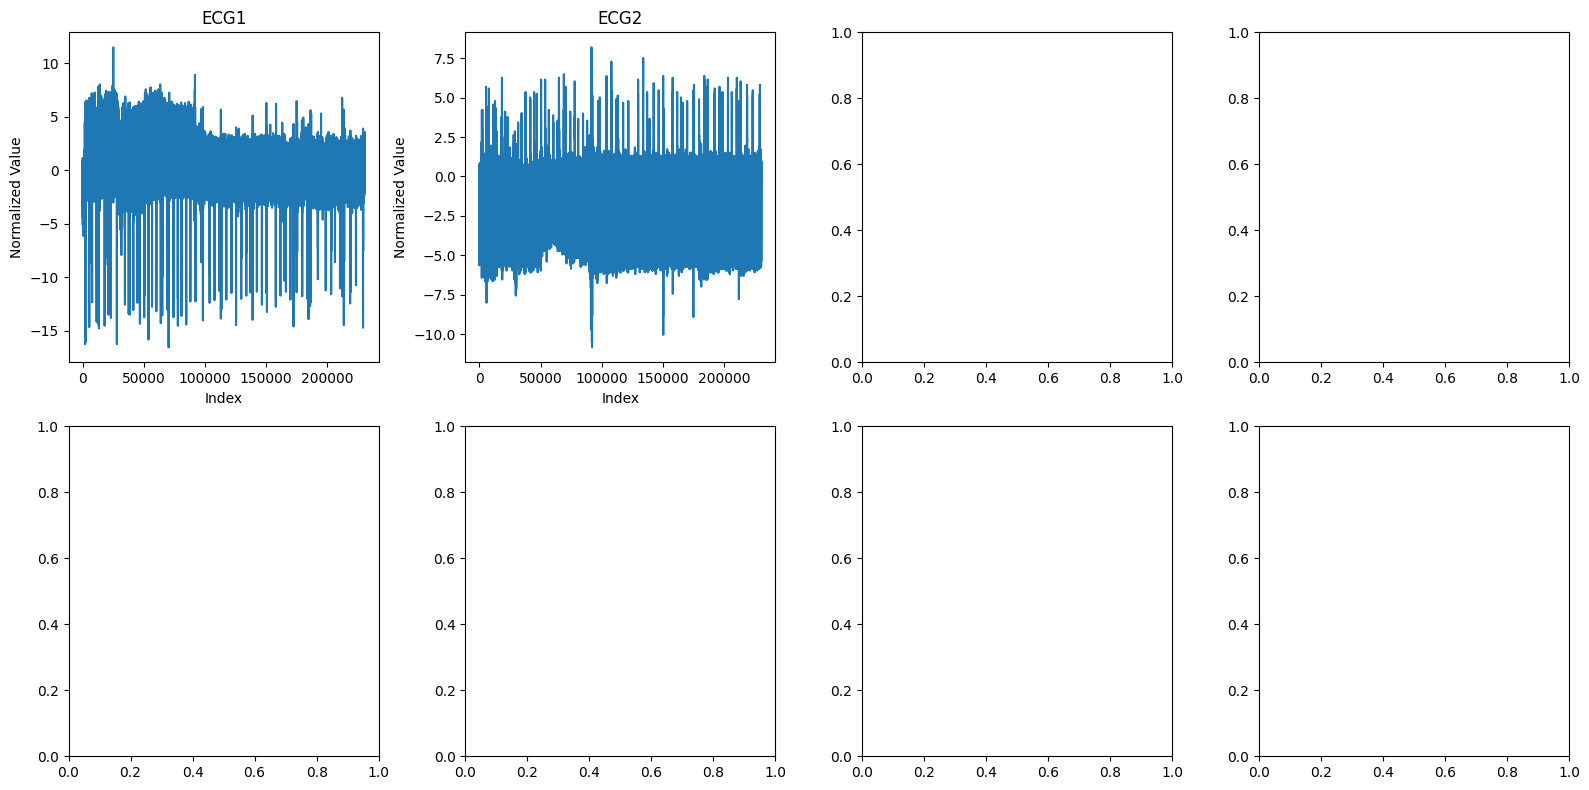

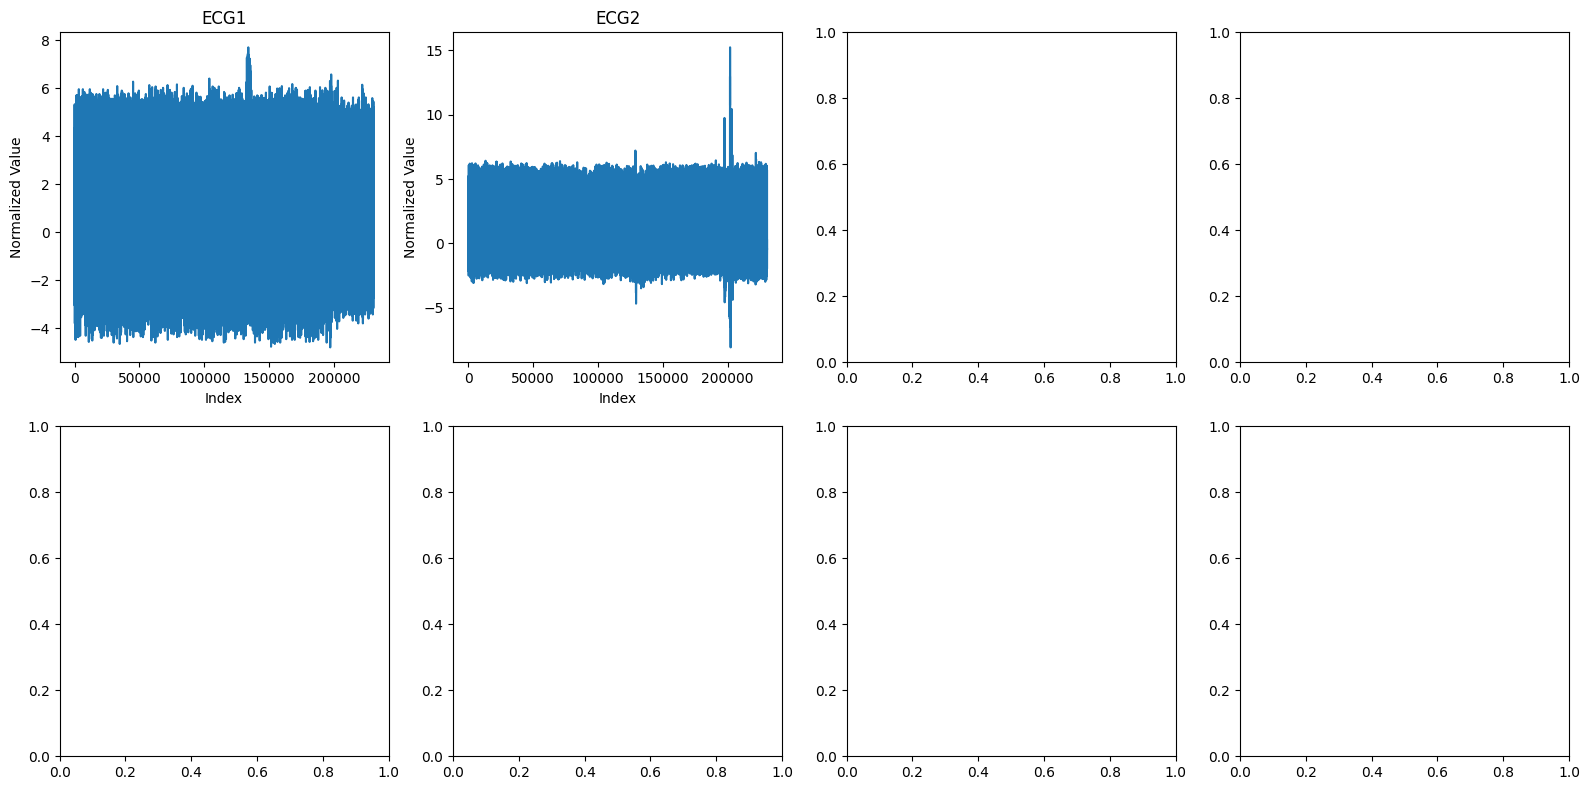

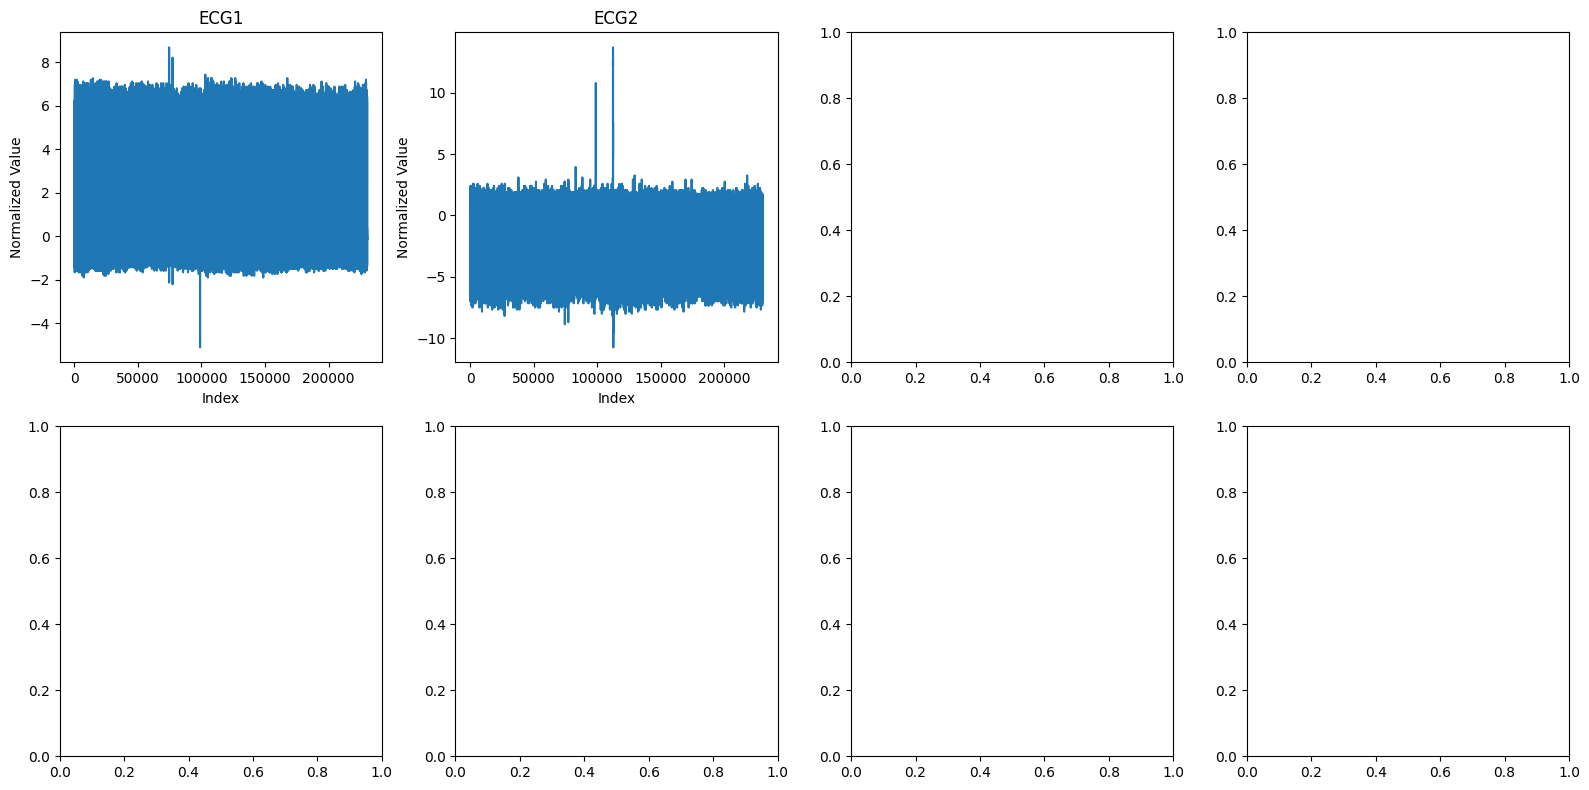

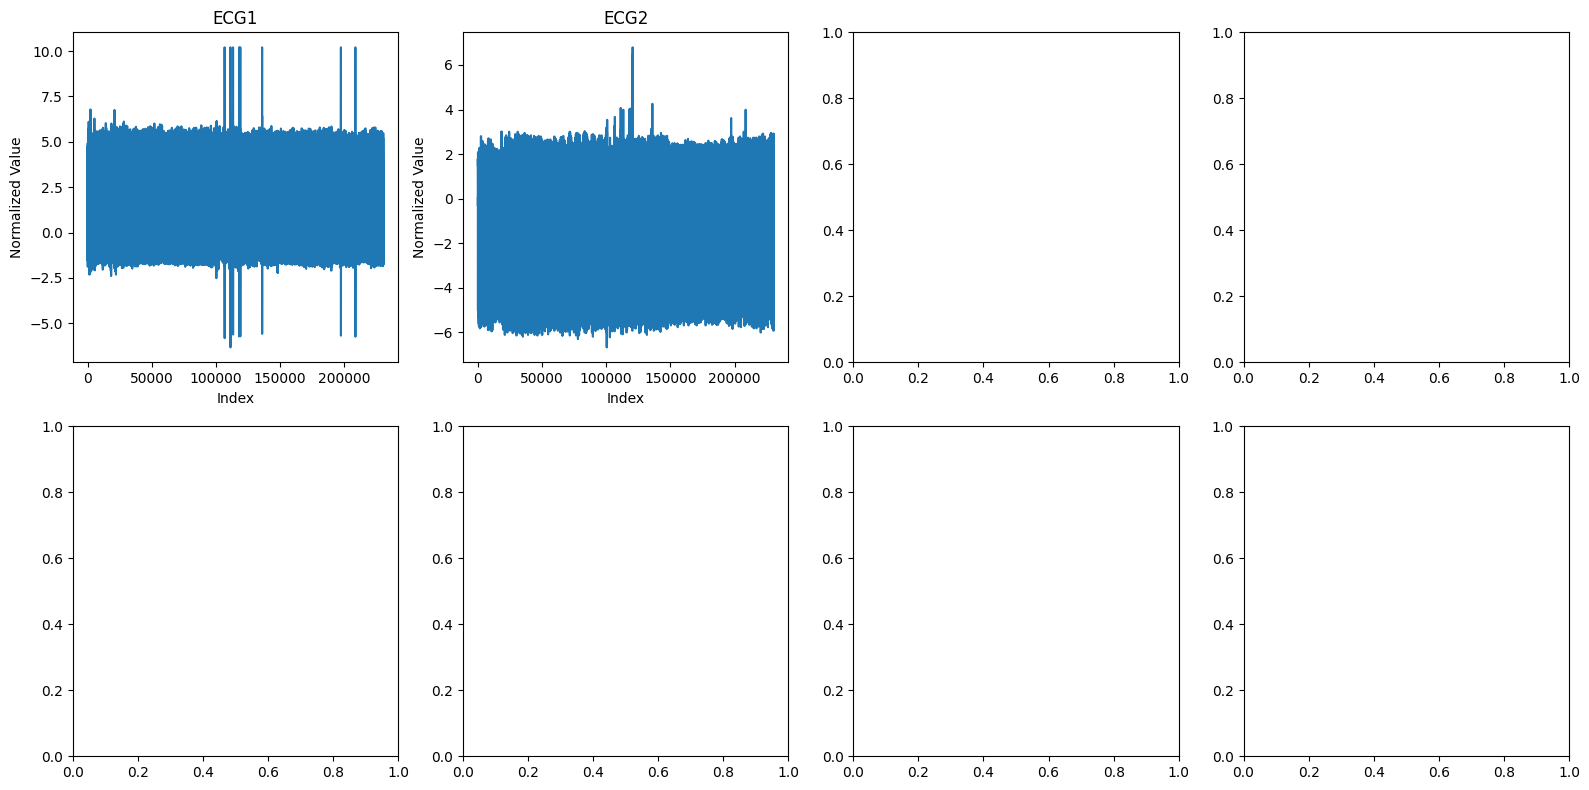

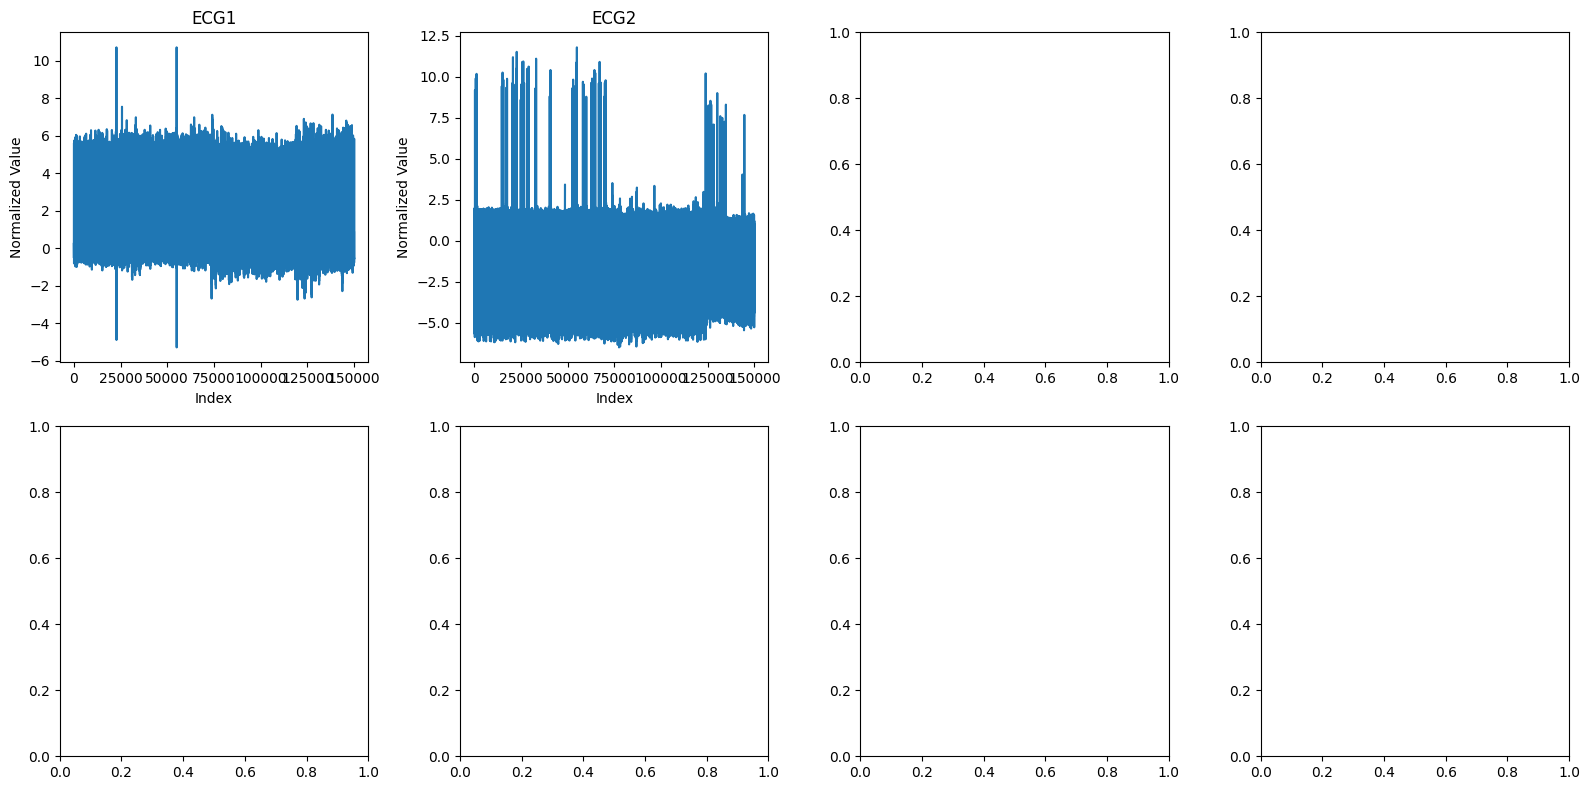

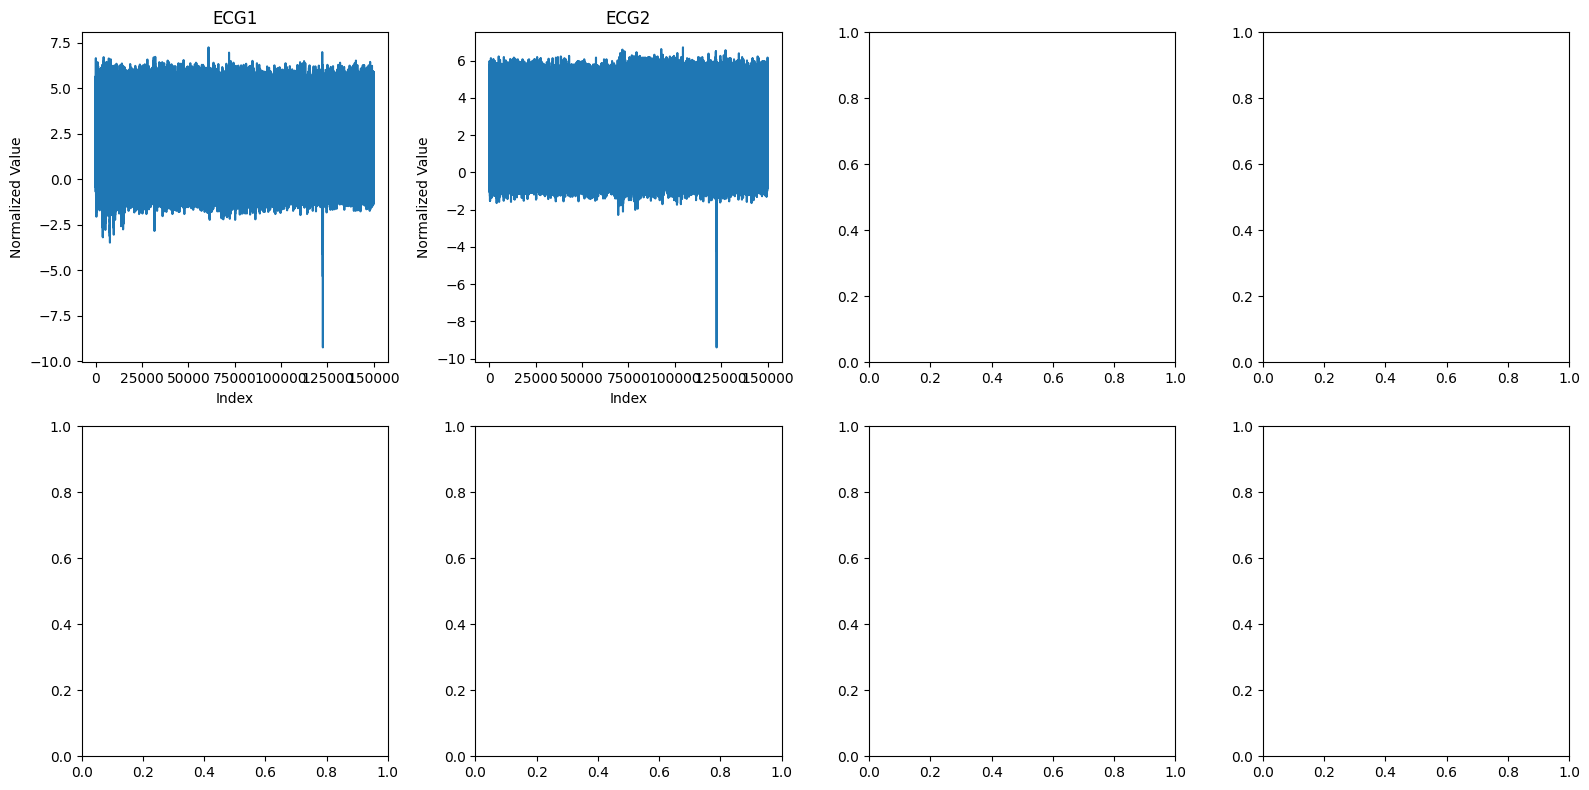

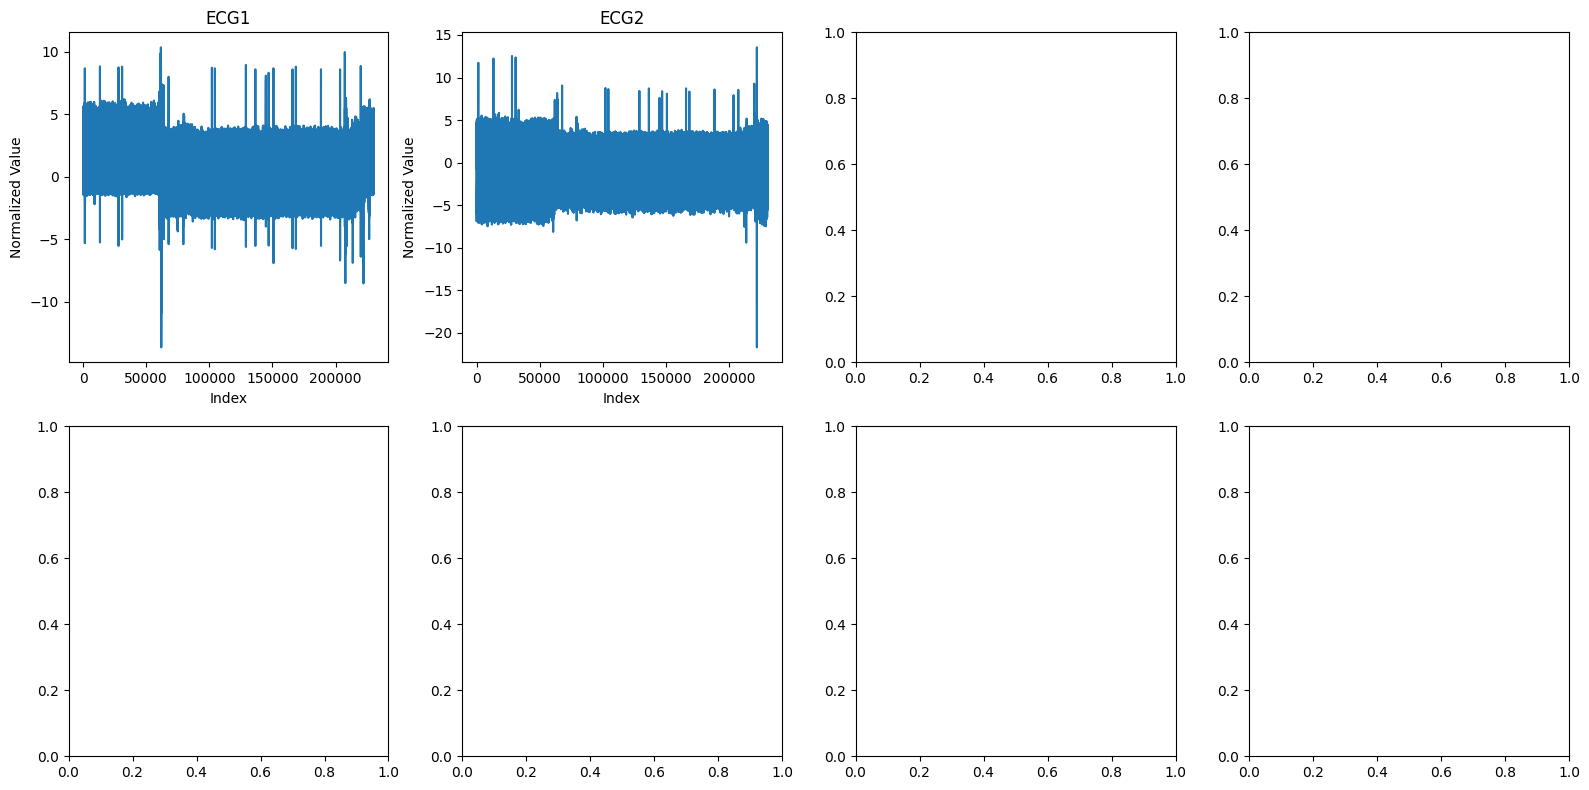

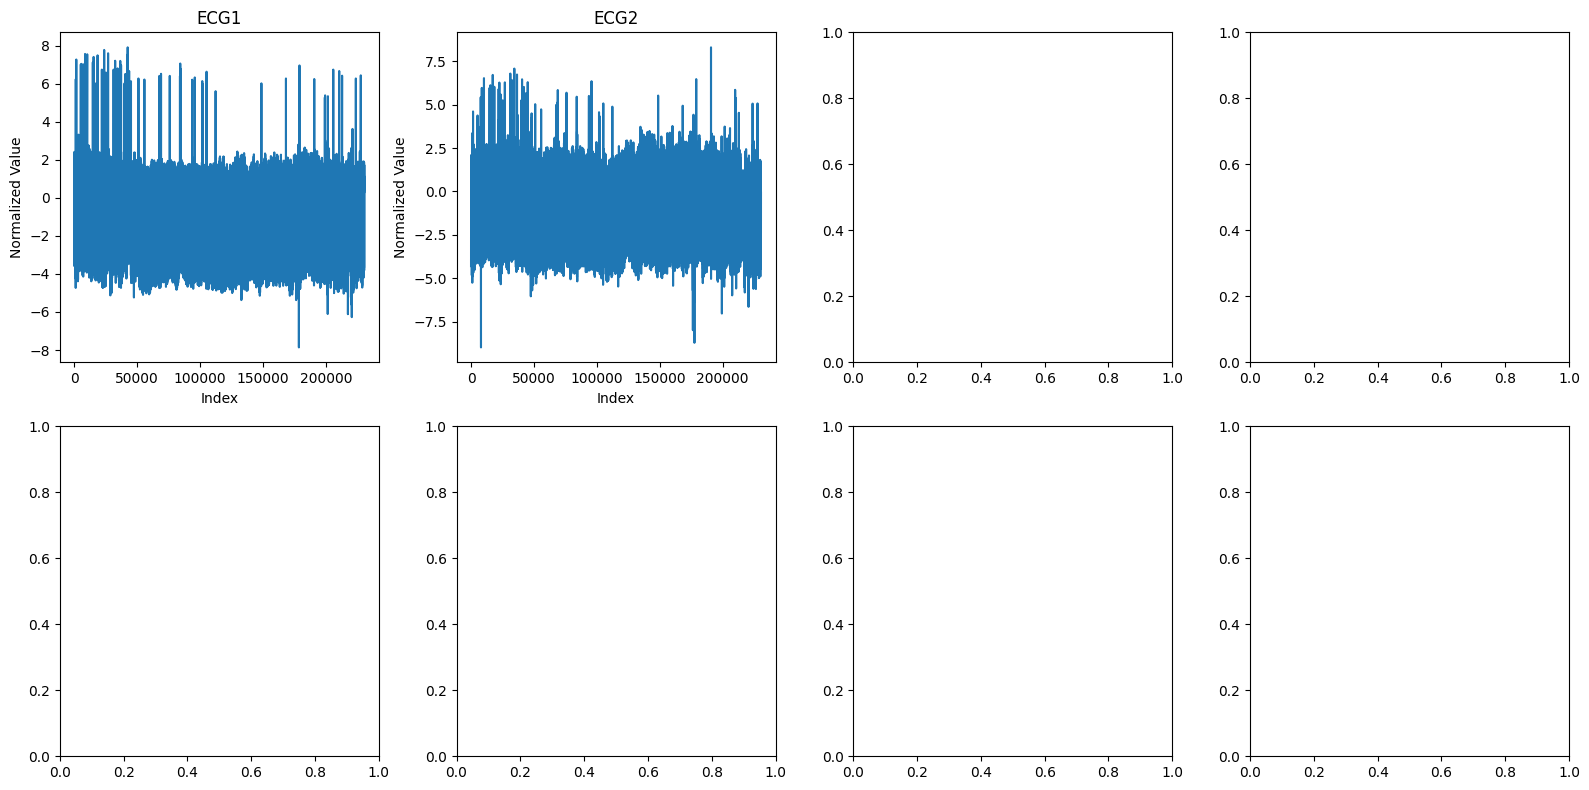

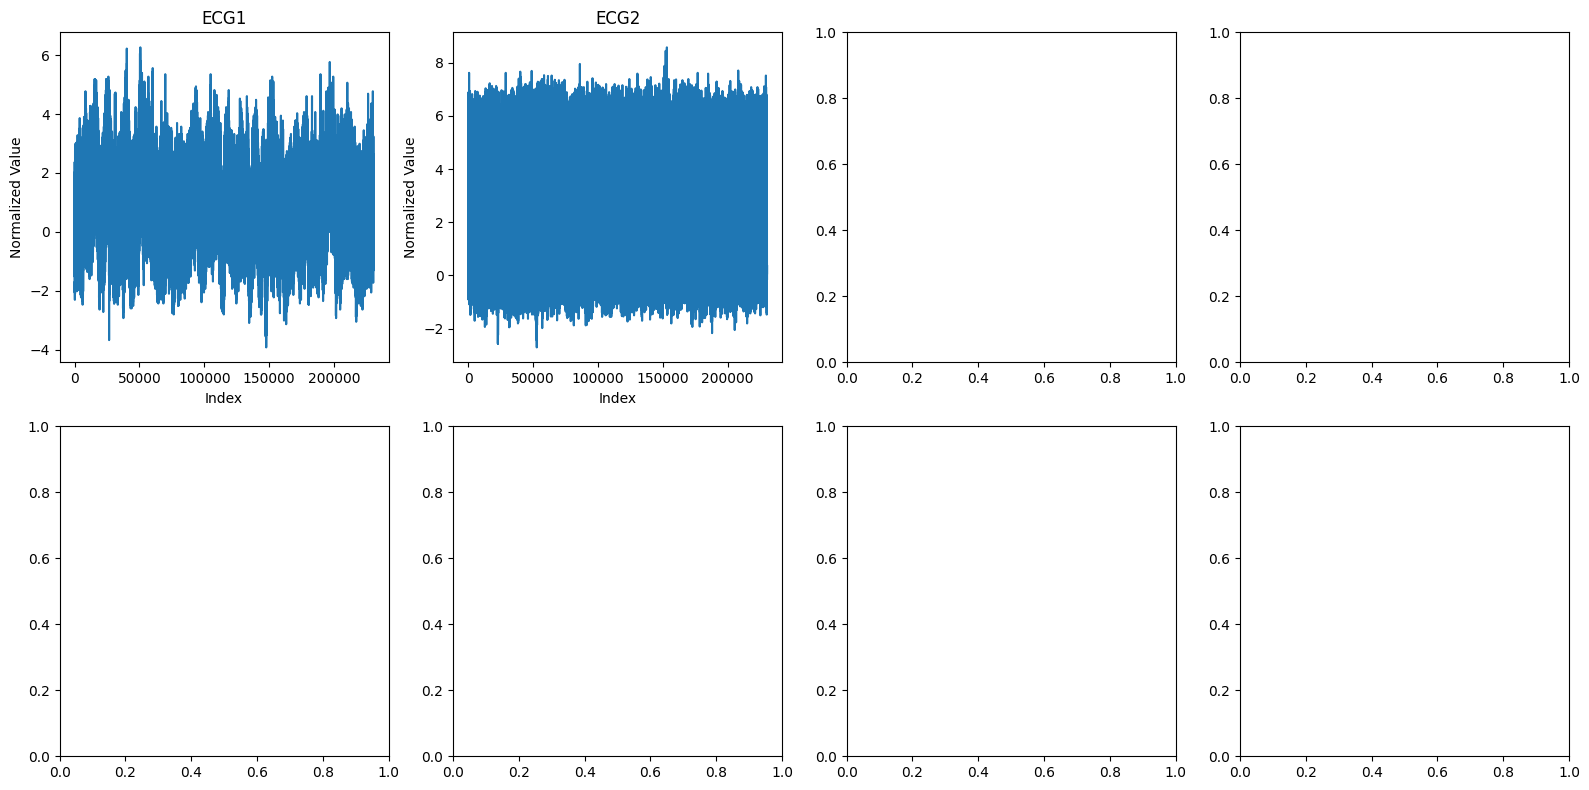

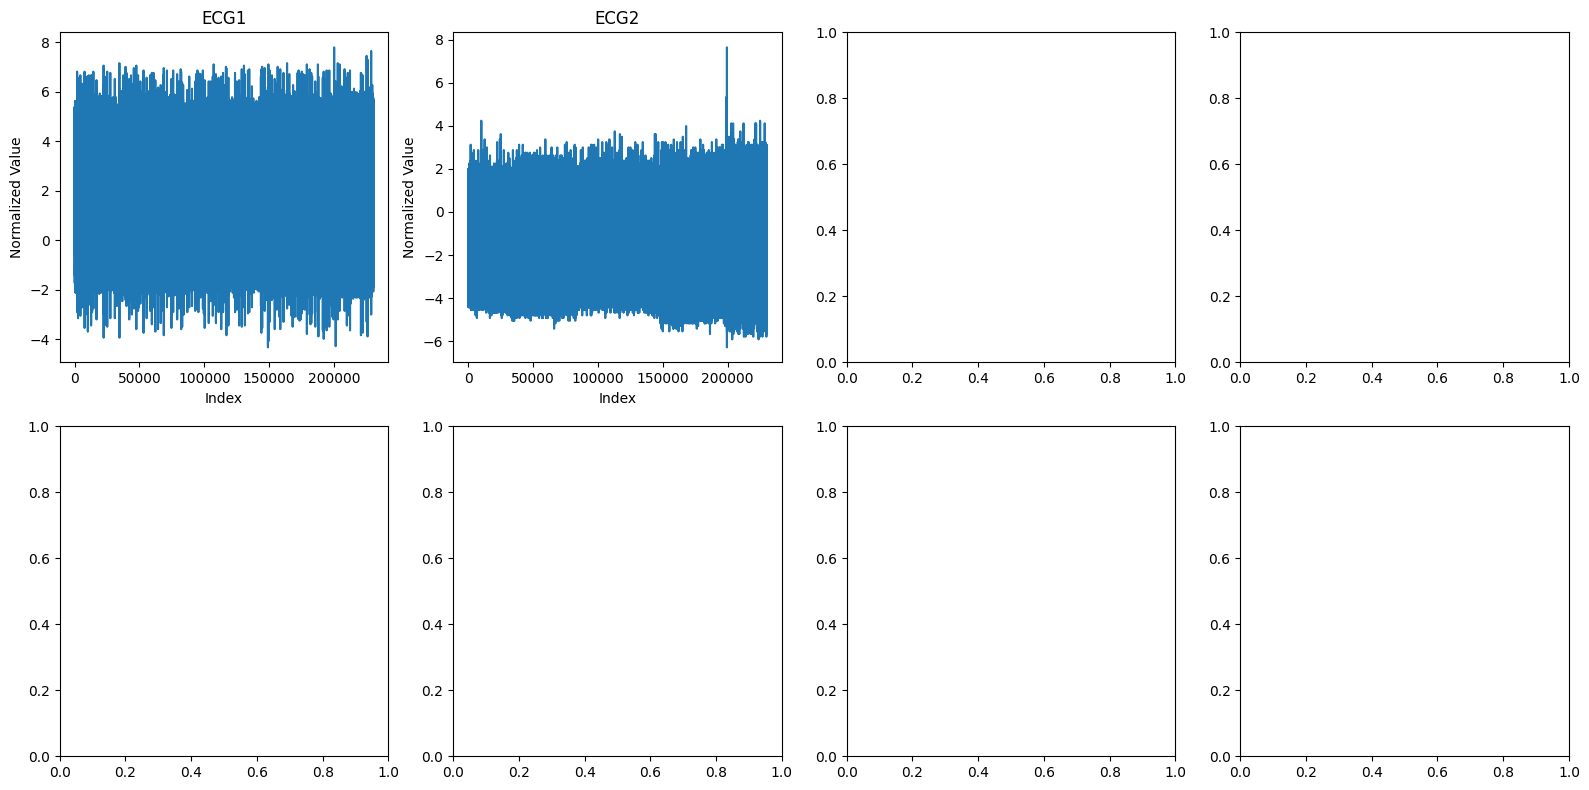

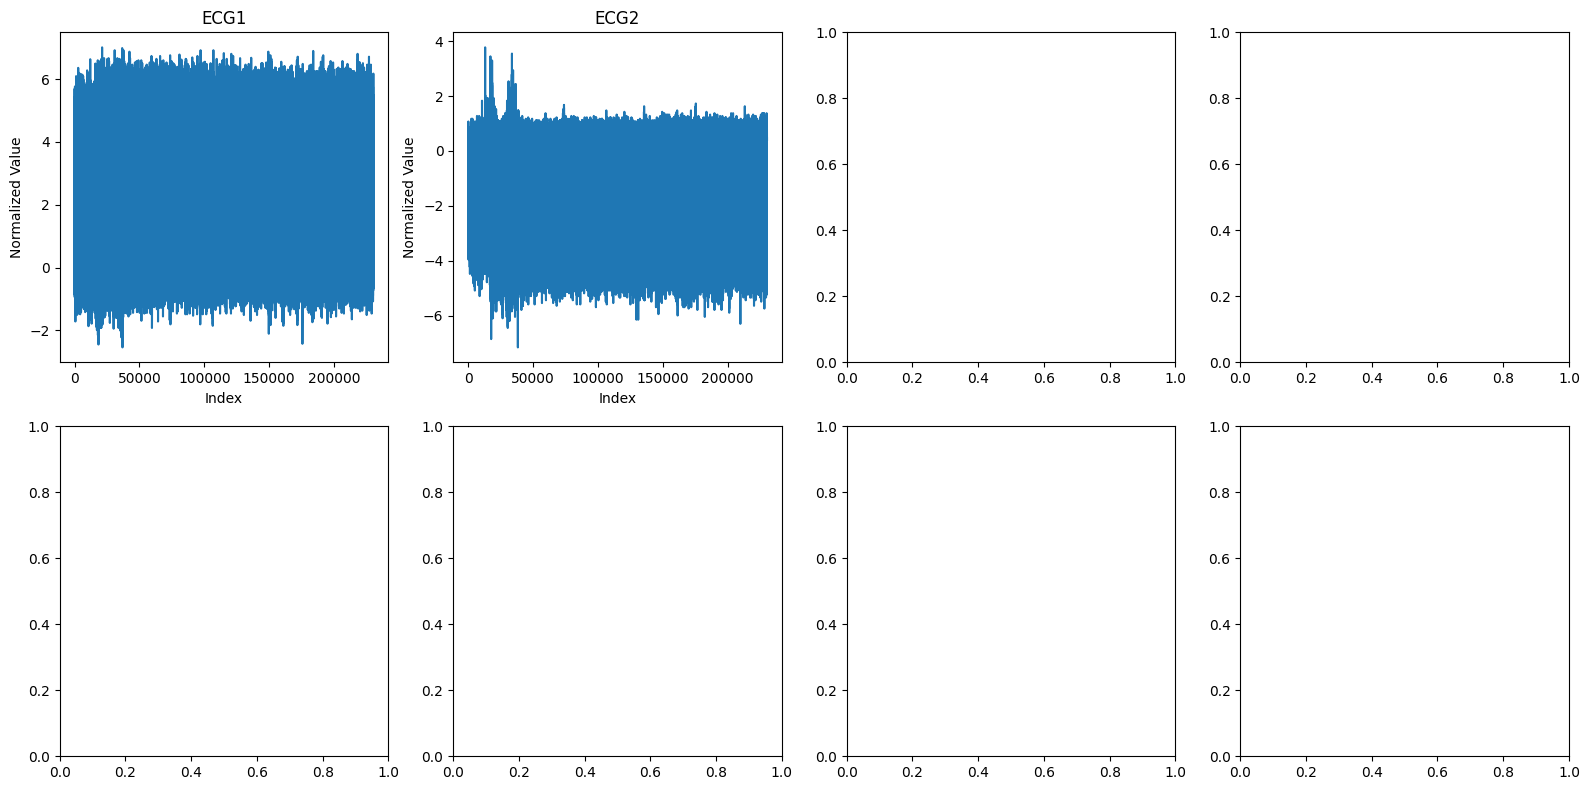

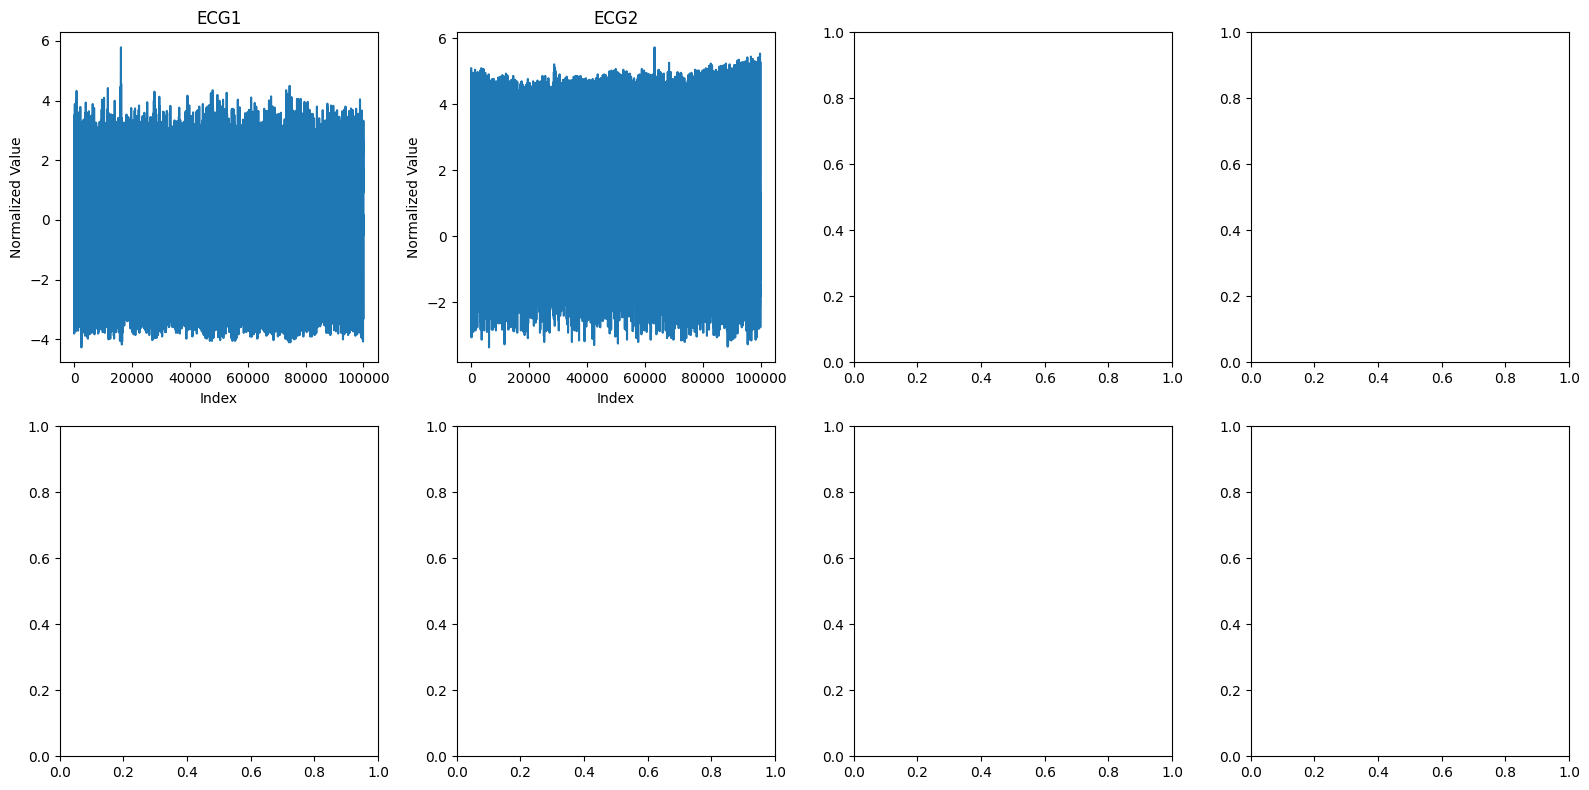

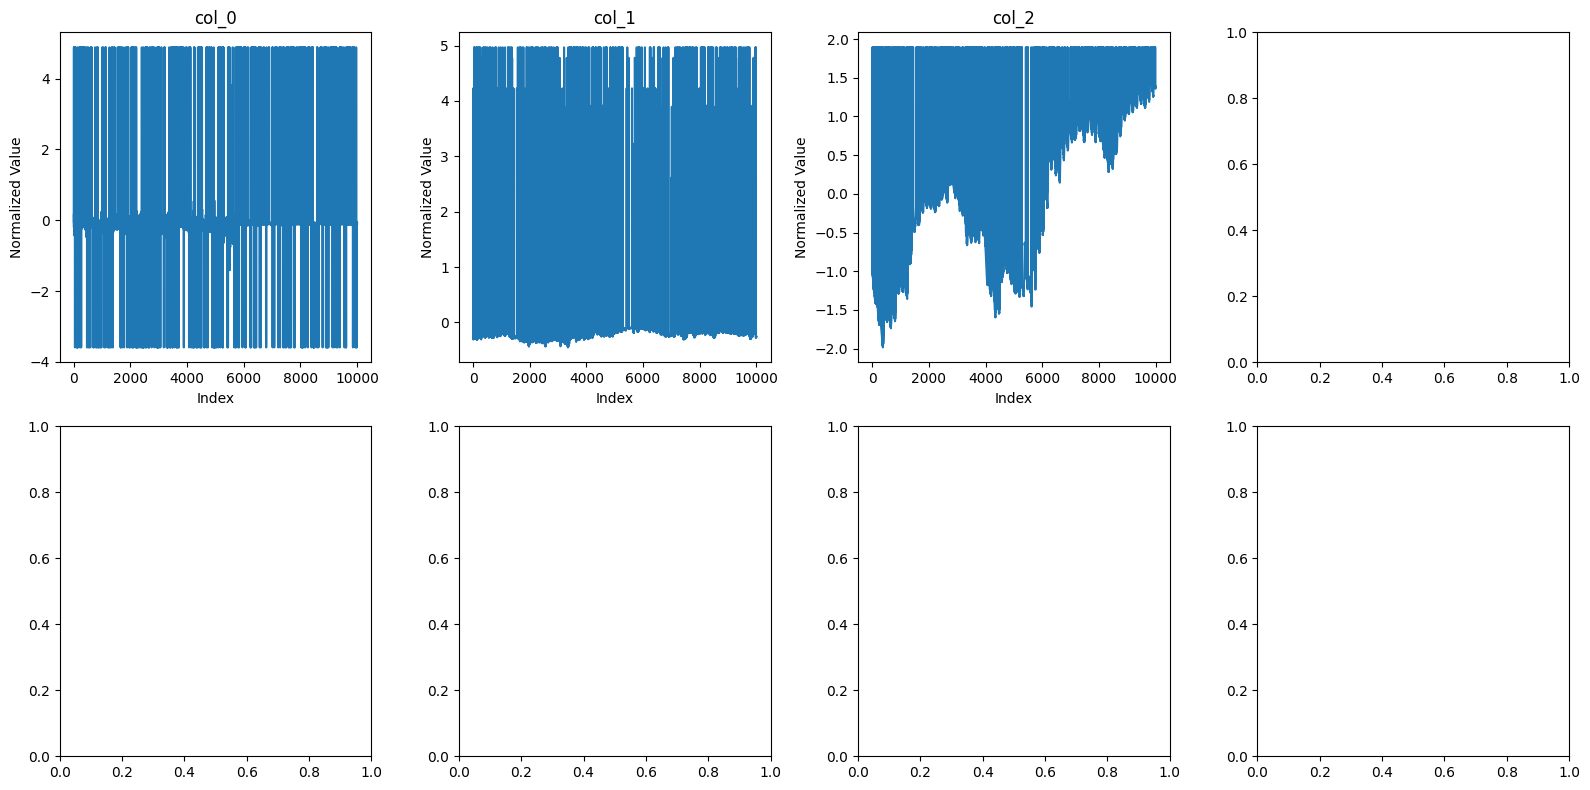

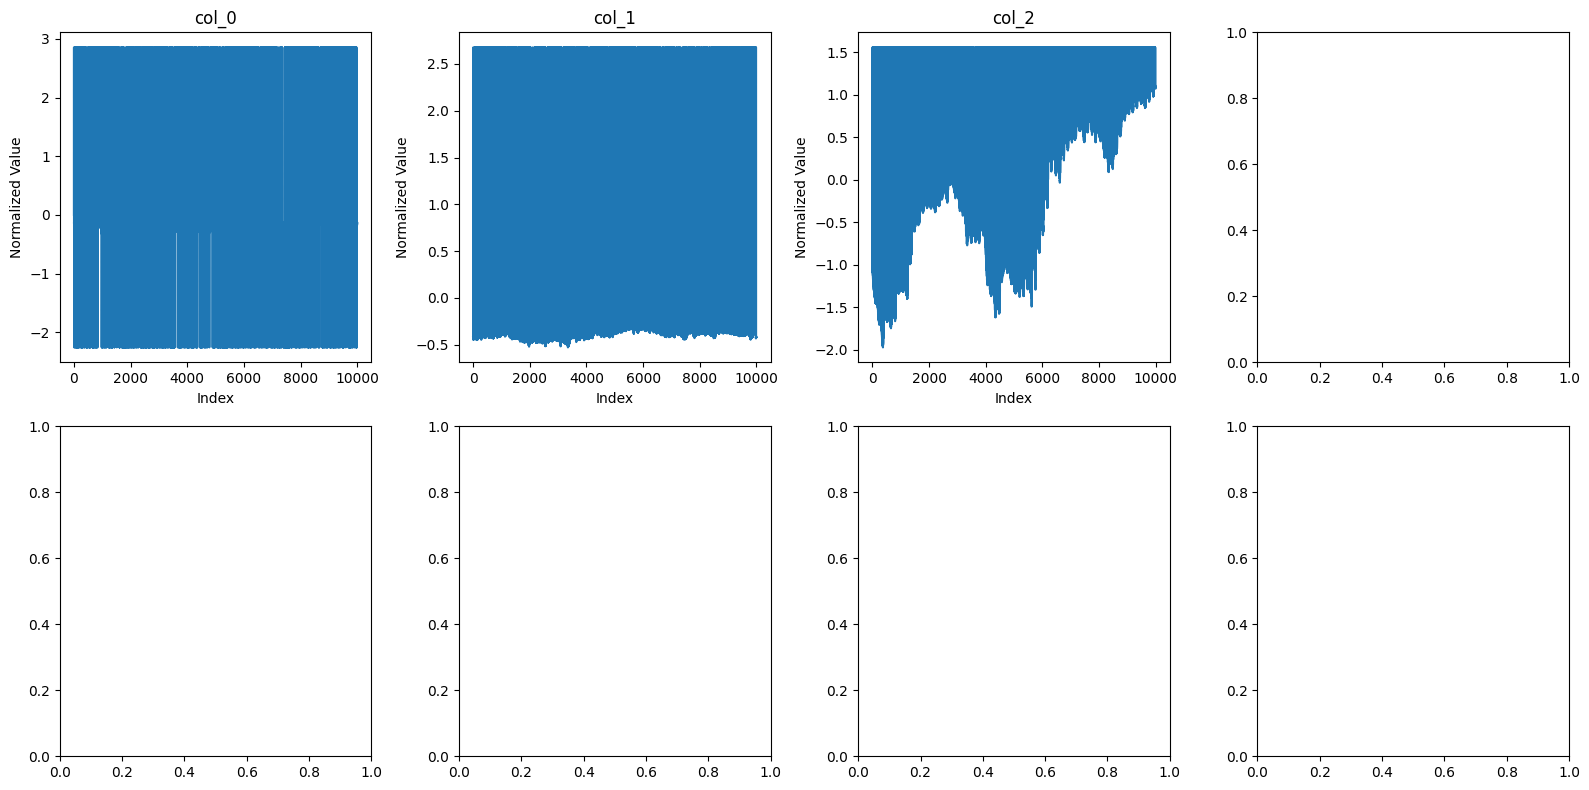

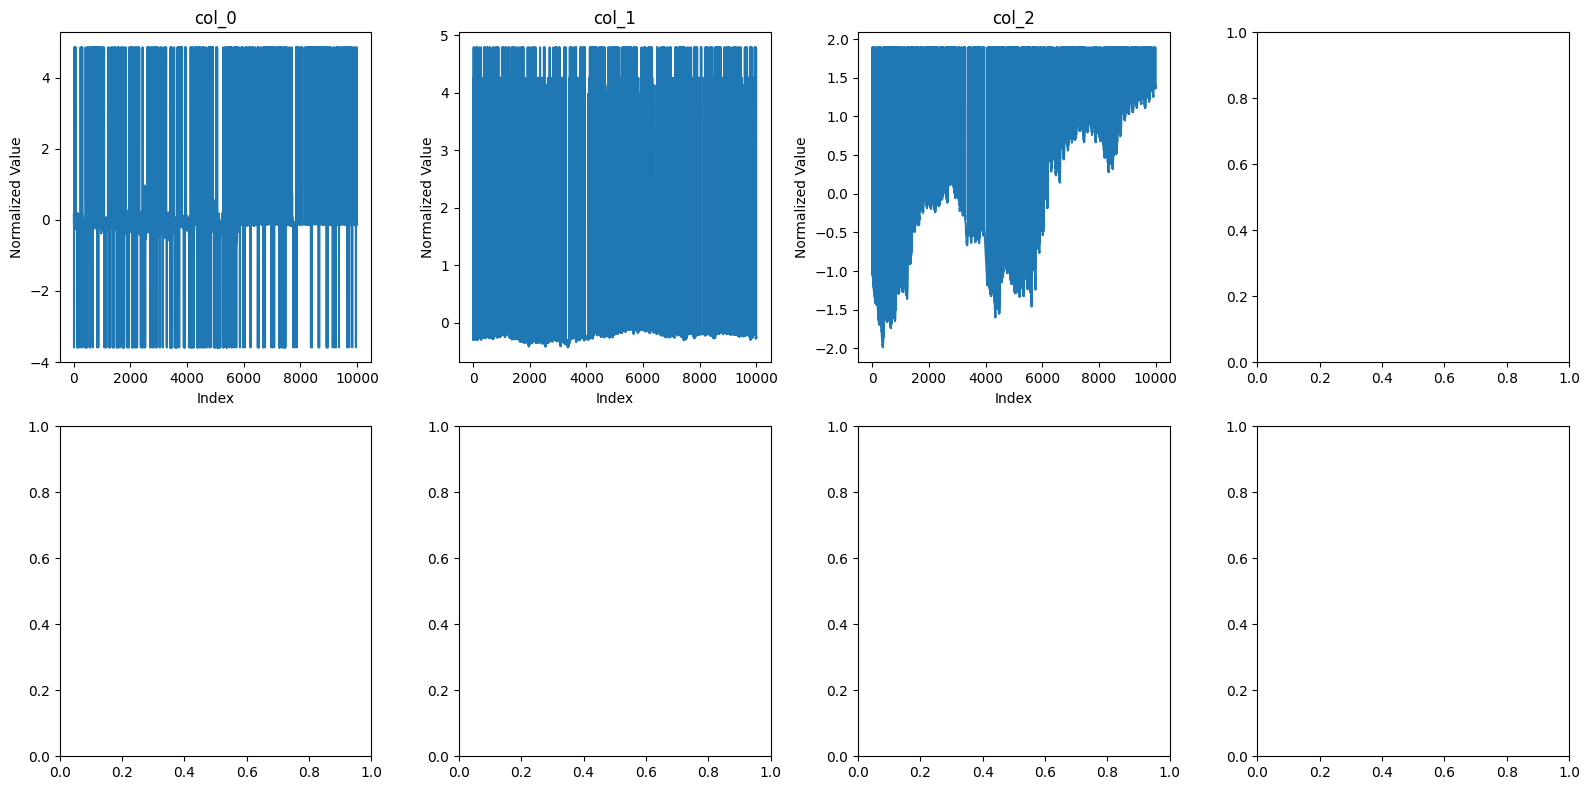

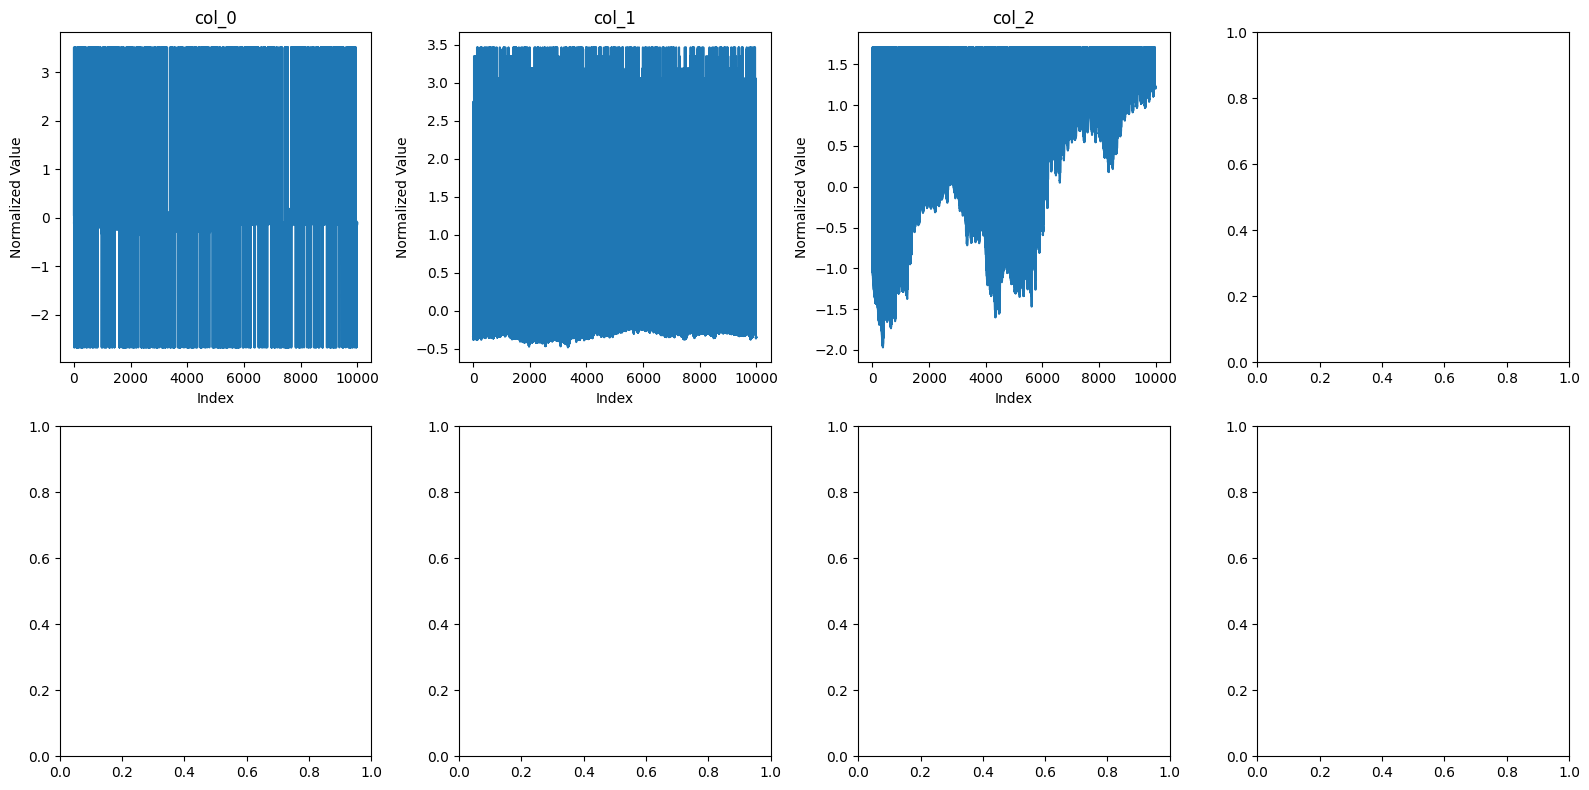

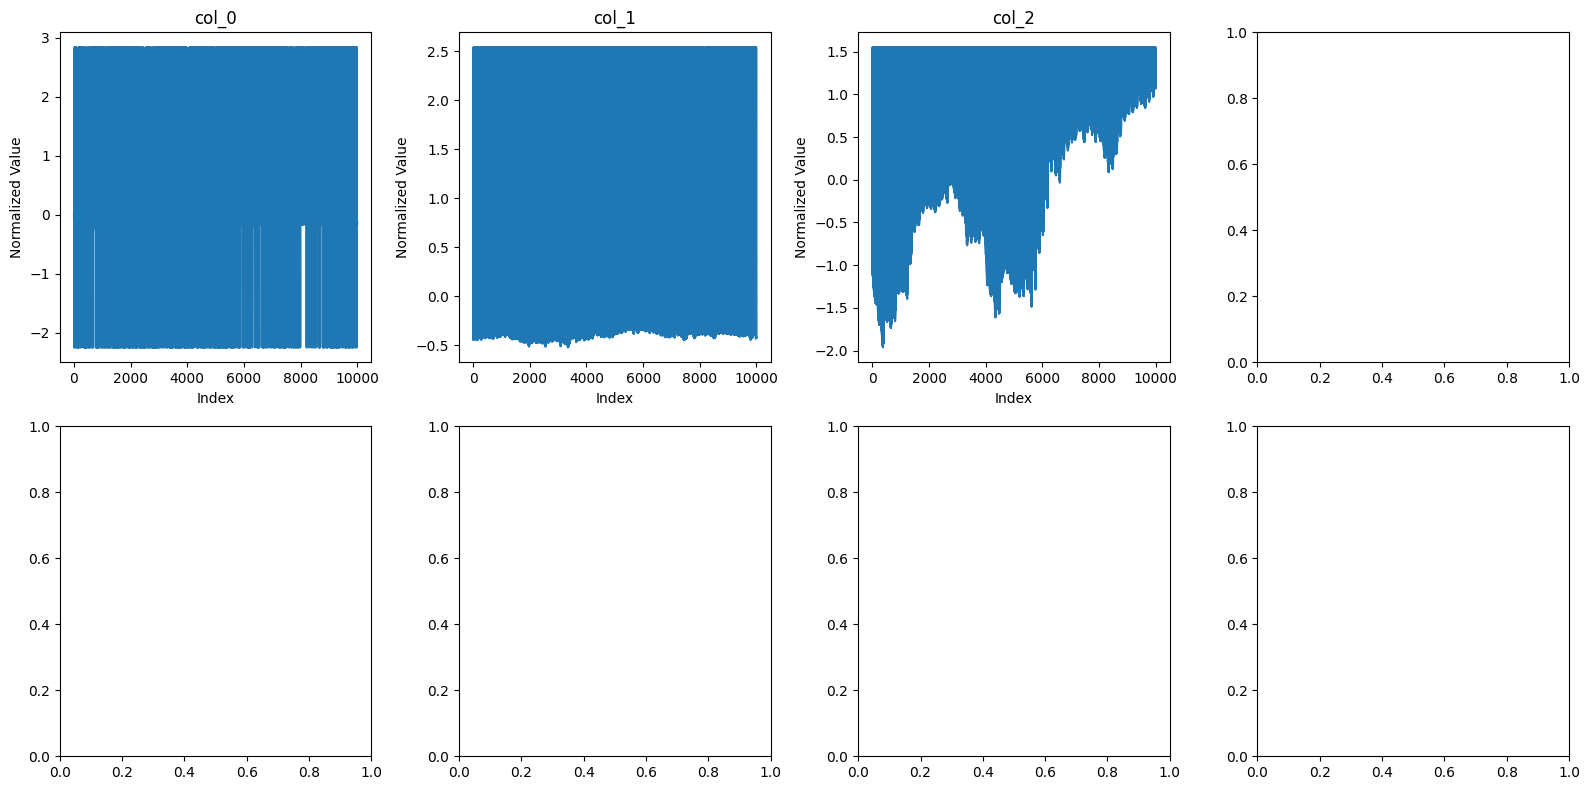

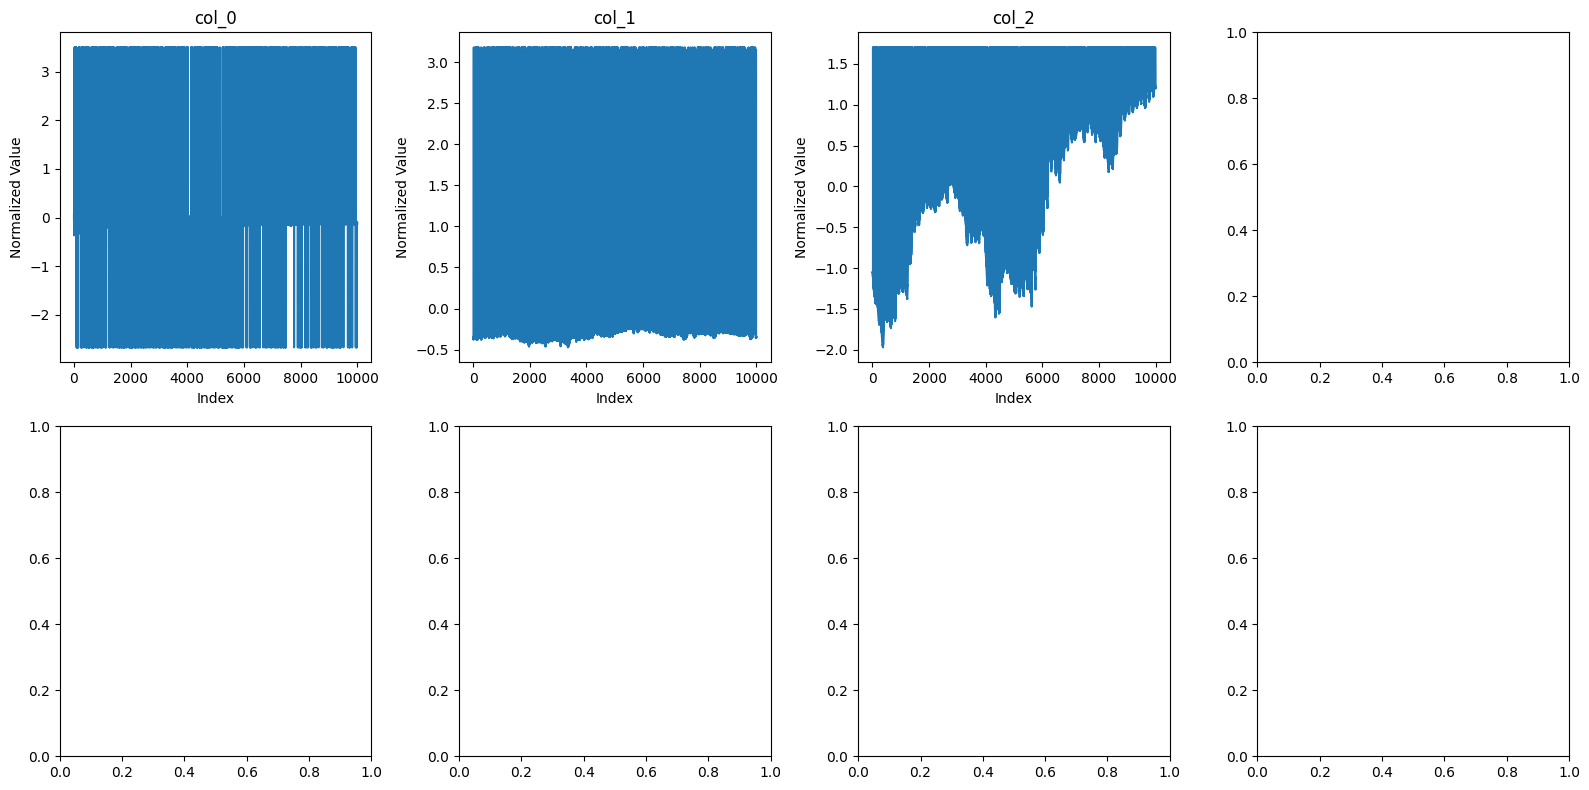

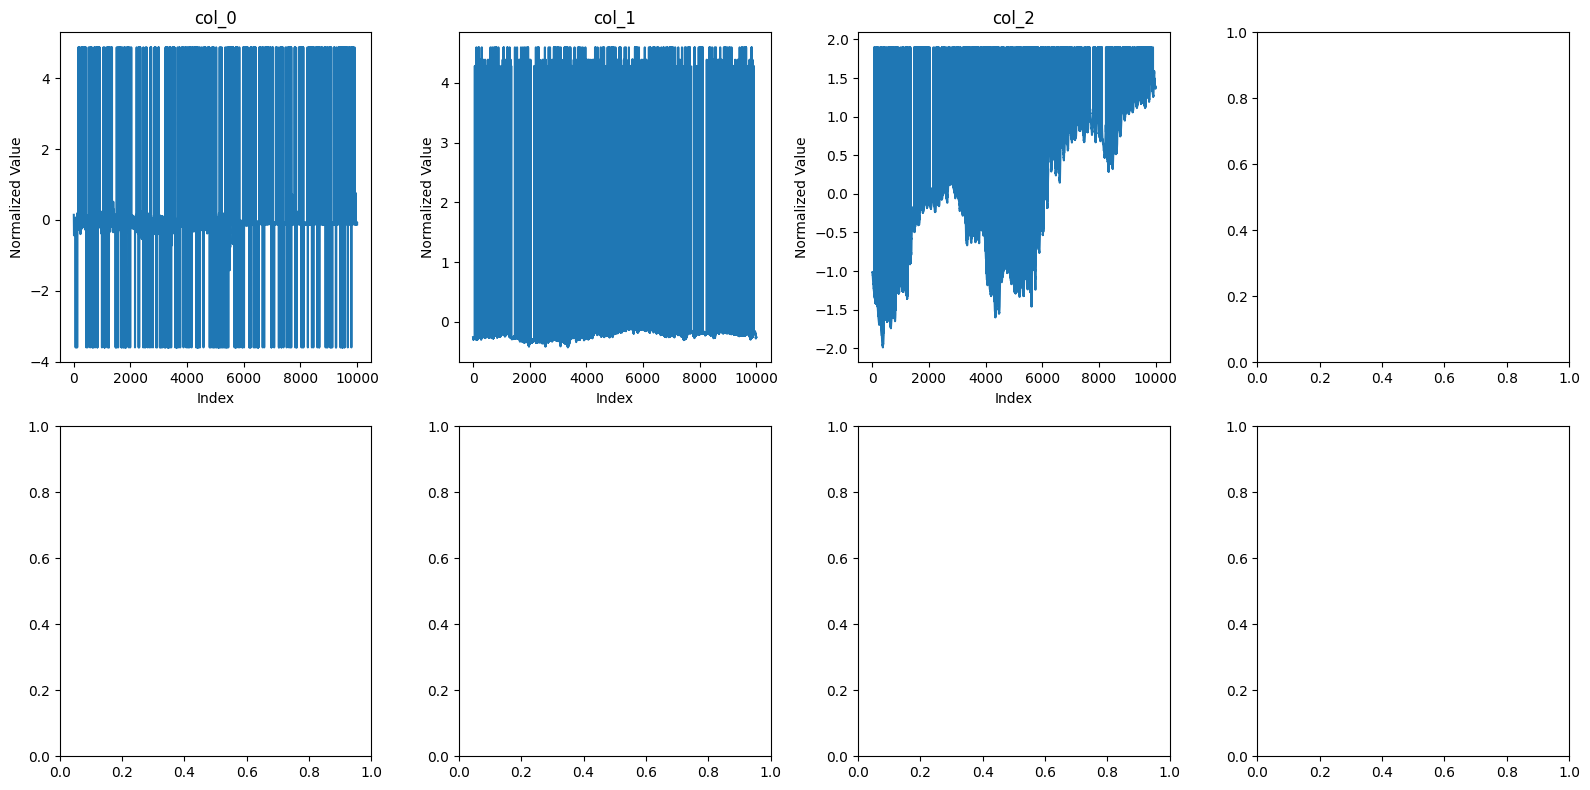

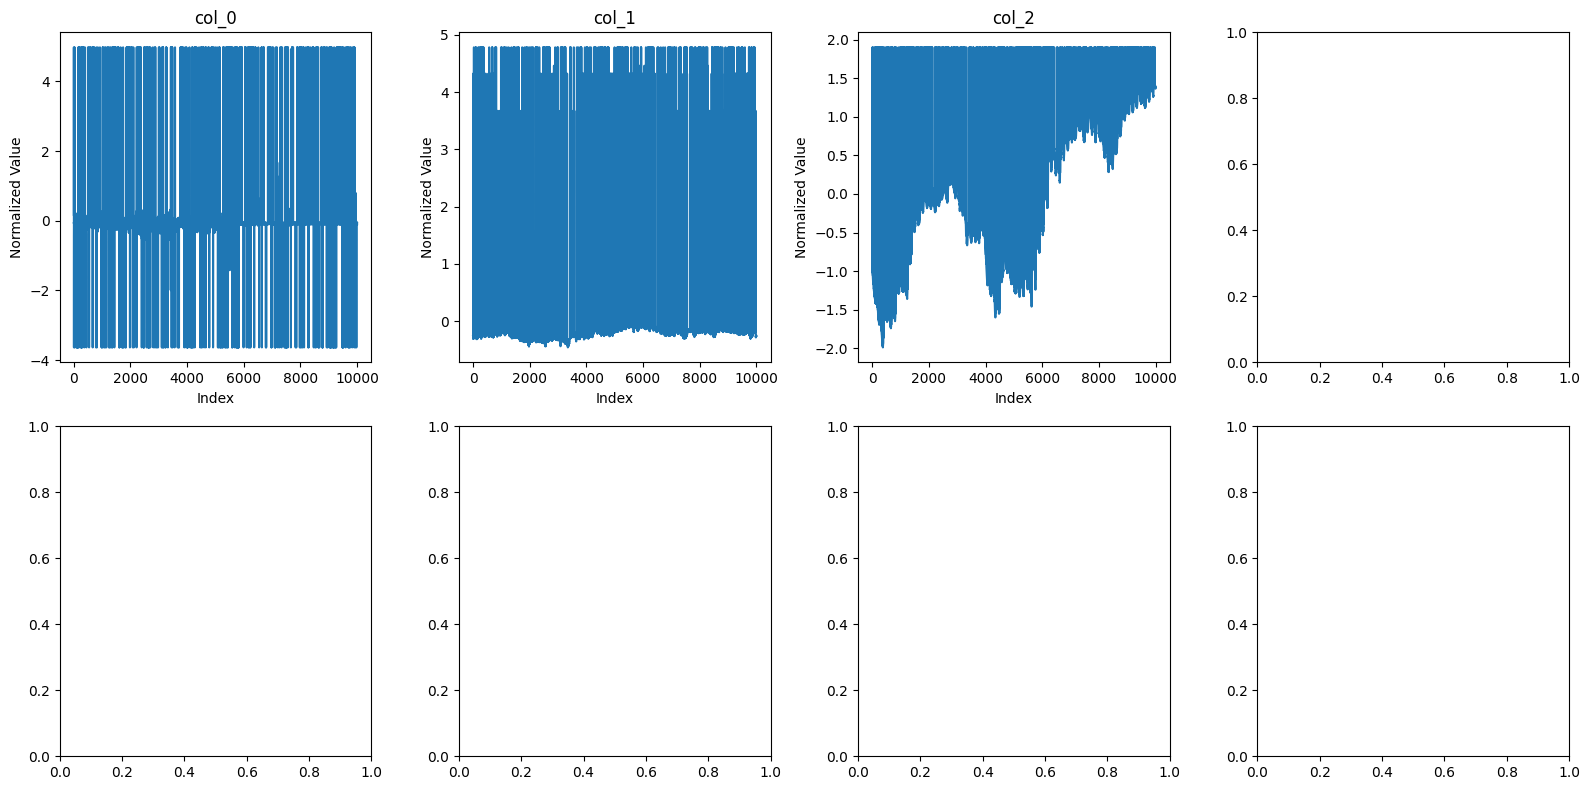

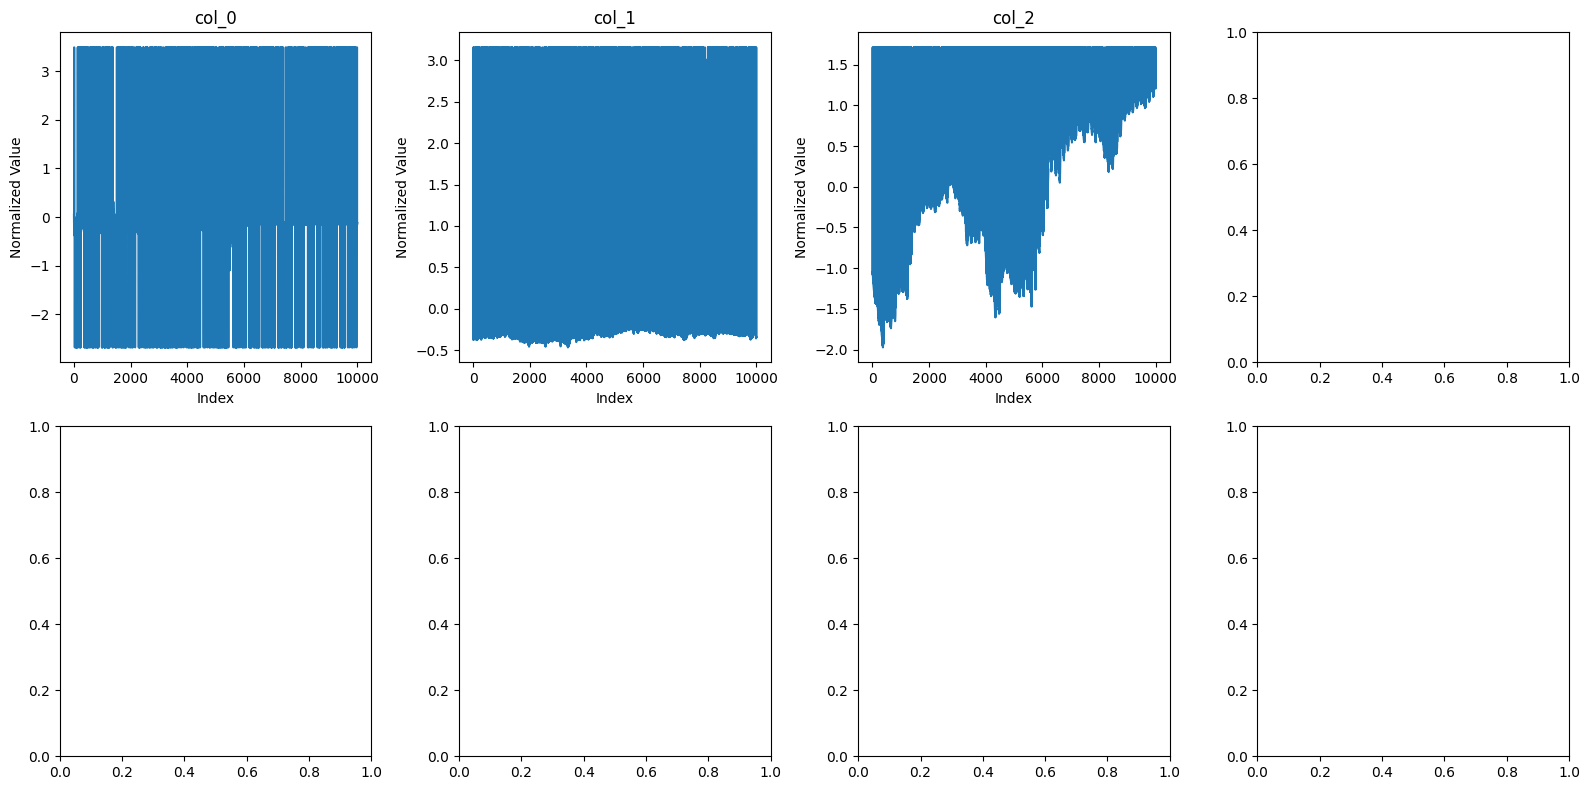

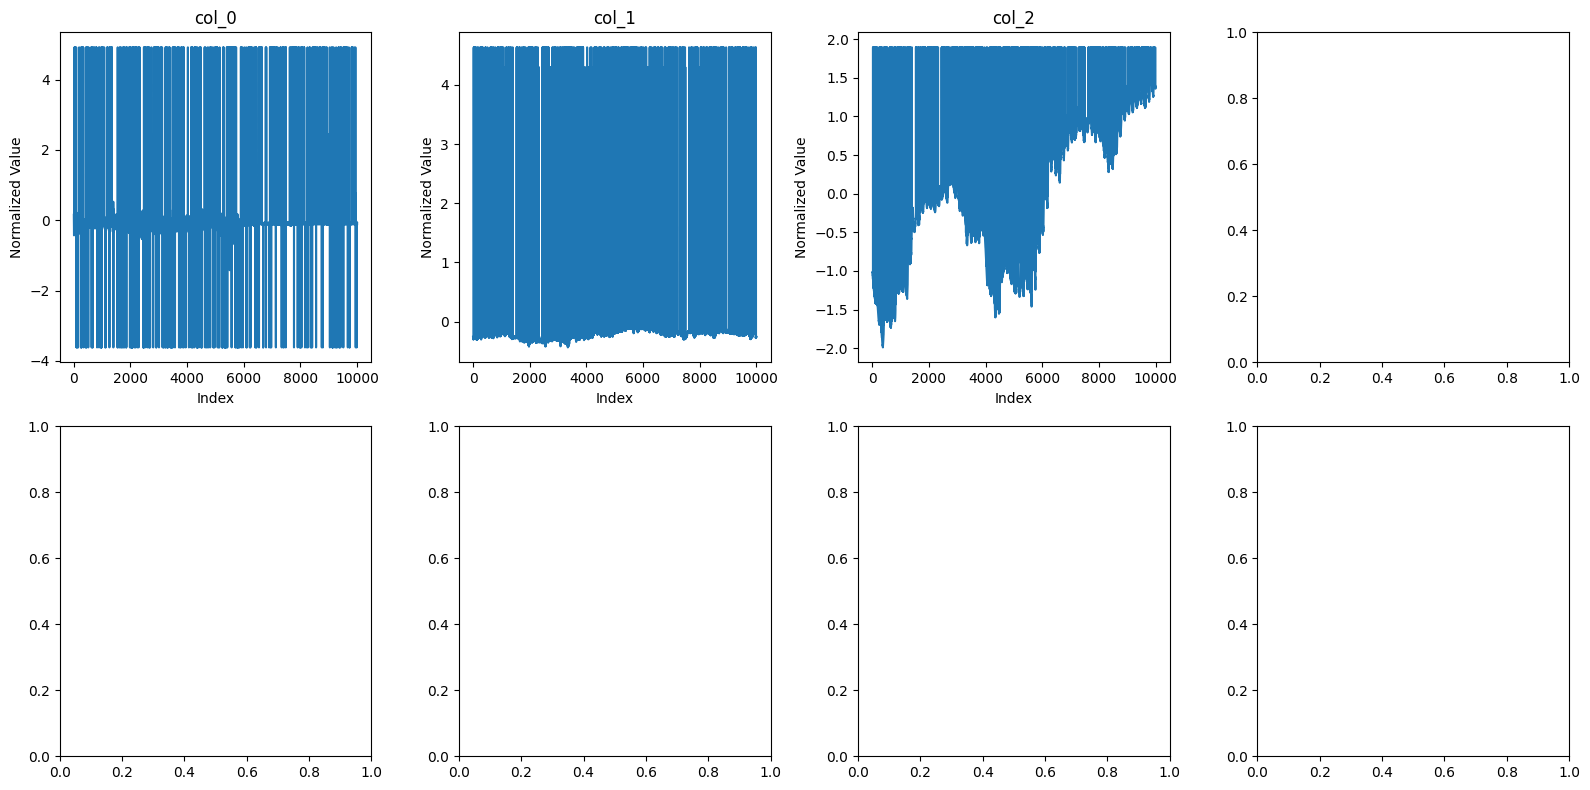

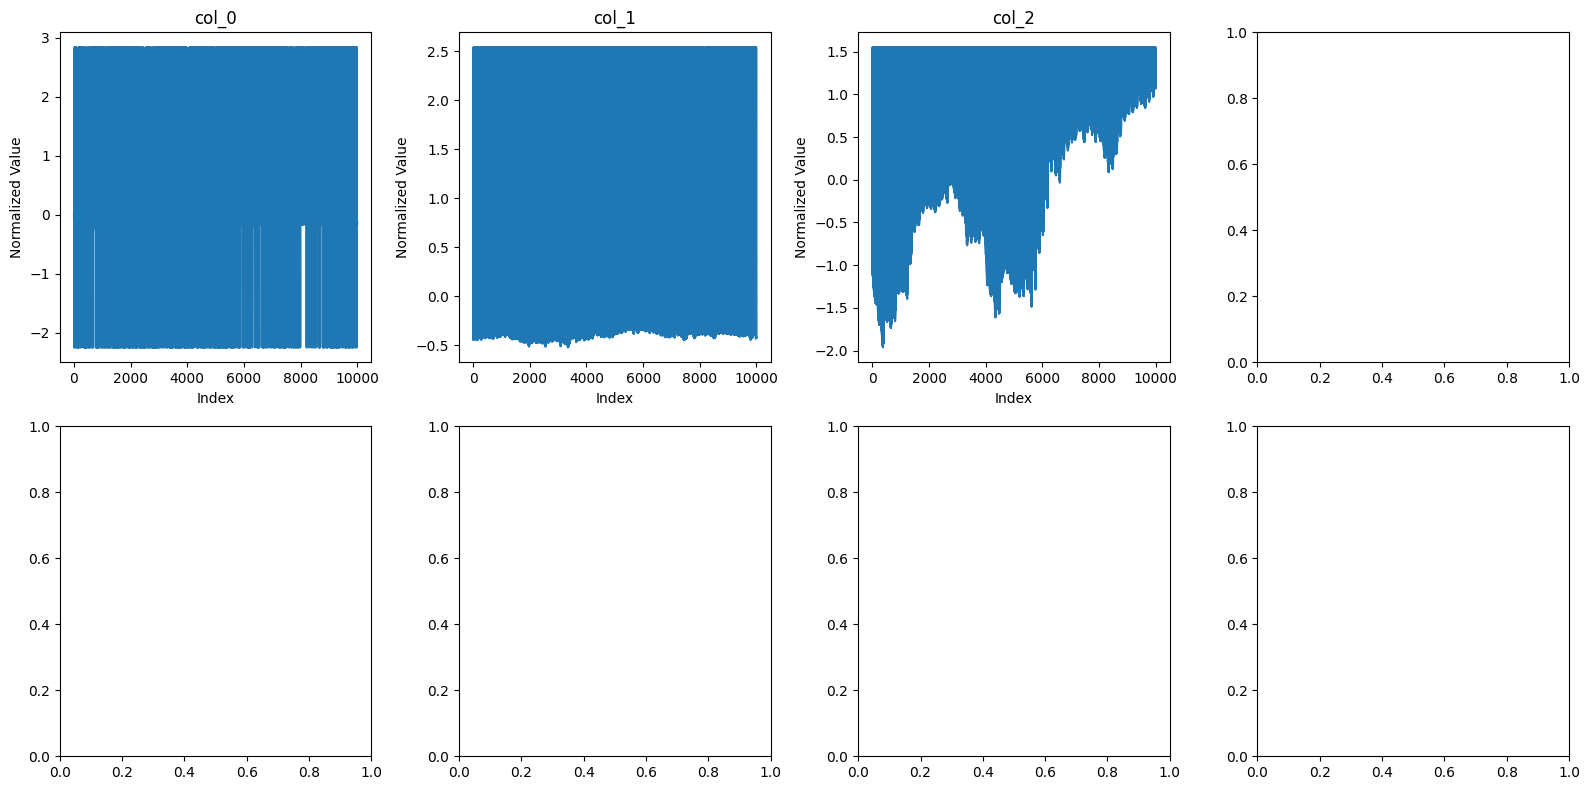

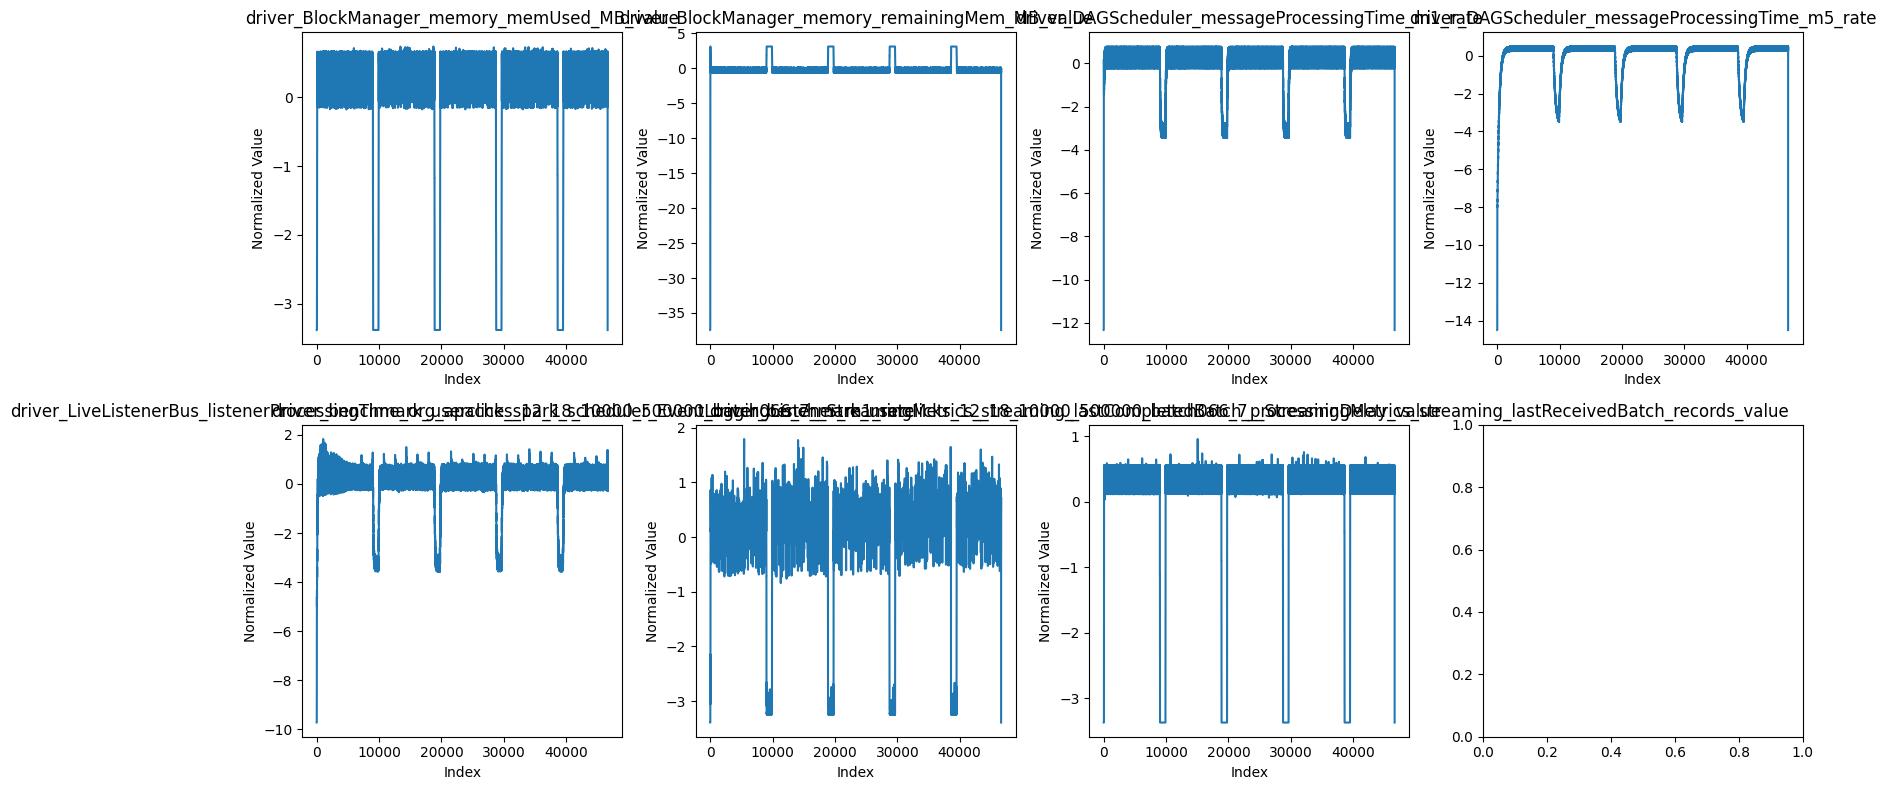

In [25]:
summary_dict = {}
dir_path = '/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M'
for file_name in file_list:
    file_path = os.path.join(dir_path, file_name)
    df = pd.read_csv(file_path)

    maxes = []
    mins = []
    means = []

    columns = df.columns
    for col in columns:
        if col == 'Label':
            continue
        maxes.append(df[col].max())
        mins.append(df[col].min())
        means.append(df[col].mean())

    temp_tuple = (maxes, mins, means)
    summary_dict[file_name] = temp_tuple

    # if number of columns is less than 9, plot after z-score normalization
    if len(columns) < 9:
        df_normalized = (df[columns[:-1]] - df[columns[:-1]].mean()) / df[columns[:-1]].std()
        fig, axes = plt.subplots(2, 4, figsize=(16, 8))
        axes = axes.flatten()
        for i, col in enumerate(columns[:-1]):
            axes[i].plot(df_normalized[col])
            axes[i].set_title(col)
            axes[i].set_xlabel('Index')
            axes[i].set_ylabel('Normalized Value')
        plt.tight_layout()
        #plt.savefig(f"{file_name}_normalized.png")
        plt.show()
        plt.close()

In [26]:
print(len(summary_dict))

180


In [27]:
counter = 0
for file_name, summary in summary_dict.items():
    maxes, mins, means = summary
    # if there exists any value that is greater than 10, print below else skip
    if any(value > 10 for value in means):        
        print(f"File: {file_name}")
        print(f"Max values: {maxes}")
        print(f"Min values: {mins}")
        print(f"Mean values: {means}")
        print("-" * 40)  # Separator for readability
        counter += 1
print(f"Total files with mean values greater than 10: {counter}")

File: 001_Genesis_id_1_Sensor_tr_4055_1st_15538.csv
Max values: [1181, 389992, 110954, 6090, 260, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Min values: [-1181, 22011, -422617, -3045, -256, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Mean values: [-4.714056720098644, 207315.83292231814, 139.40024660912454, -1.5876695437731196, -1.811960542540074, 0.06393341553637484, 0.1403822441430333, 0.19451294697903823, 0.06029593094944513, 0.06504315659679408, 0.934956843403206, 0.14241676942046855, 0.8459309494451295, 0.13057953144266338, 0.9975339087546239, 0.02059186189889026, 0.5158446362515413, 0.10474722564734895]
----------------------------------------
File: 017_MSL_id_16_Sensor_tr_512_1st_1850.csv
Max values: [258.1081081081054, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0]
Min